<h1 align="center"> Project Milestone 2: Data Anaysis 1 </h1>
<h1 align="center"> Master Document </h1>
<h3 align="center"> Members: Joshua Jaeger, Maxwell Butler, Austin Funcheon, Conor Joyce, Casey Kemerer, David Poteet </h3>
<h3 align="center"> IST 5520, 2021 Fall </h3>
<h3 align="center"> November 23rd 2021 </h3>
<h3 align="center"> Group 7 </h3>

 <h1 align="center">  Introduction: </h1>
 
 Group 7 intends to use the Lahman Database of MLB statistics to create a fair market calculator for different MLB player's salaries. The database will act as our training set and will be partitioned to include a test set to test the effectiveness of our calculator.

General Managers, or GMs, in the MLB often struggle with determining the true value of a player. These GMs are expected to bring a championship to their team, which involves balancing talent with a budget. There are a significant number of statistics that are utilized to demonstrate the performance of both position players and pitchers, but what statistics truly determine the value of the player. How is a GM able to evaluate a player's performance and provide a salary relatable to their value? The business problems we intend to answer to understand the value of players can be summarized with the following questions:
<ul>
    <li> Given a pitcher's performance what should their salary be? </li>
    <li> Given a batter's performance what should their salary be? </li>
    <li> Given a position player's defensive performance what should their salary be? </li>
</ul>

Depending on project constraints, and what provide the best results, those questions may be modified to better understand the problem at hand.

Our intended input will be relevant season statistics for each group. For example, statistics relevant to a pitcher are ERA, Strike Outs, Win-Loss record, and other stats. However, hitting statistics are not relevant for a pitcher.

Our intended output will either be a specific value for a salary or a salary range which a team could negotiate in.

 <h1 align="center"> Database and collection: </h1>
 
The database we will be using to accomplish our task is the Lahman database, considered the most comprehensive open-source database for baseball statistics. This database meets project requirements: 
<ul>
    <li> the pitching table alone has 23 variables and over 48,000 observations, </li>
    <li> the dataset is raw and uncleansed, we will need to do a lot of cleaning and extraction to get the data we need, </li>
    <li> the data will tell an interesting story by answering our business problem, and </li>
    <li> although the dataset is used by a large number of people (specifically Sabermatricians who use statistics to find truth in baseball) this specific problem has not been addressed and our solution will be unique and independent of any work done with this database.
</ul>

The database is in a relational format with each table in a unique .csv file and has been uploaded to github.
For an explanation of the Baseball terms, and some of the combination variables that were created out of the raw data, see "StatsDictionary.csv" for additional definition and detail.

 <h1 align="center">  Data Consolidation:</h1>
 

First step is to clean, reduce dimensionally, and standardize the data.
In this case, there are two data sets: Pitching, and Hitting.

In file "Data Joining.ipynb", many of the raw files are processed and combined into the pitching and hitting data files, including the following steps:
<br>Importing the data from: 
        <li> People.csv</li>
        <li> Teams.csv </li>
        <li> Pitching.csv </li>
        <li> Batting.csv </li>
        <li> Salaries.csv </li>
Eliminating columns that have no relevance to salary analysis
<br>Export of "joinedPitchingDF.csv" and "joinedHittingDF.csv

<h1 align = 'center'> Libraries to be used: <h1> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cpi
from datetime import date
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor


%matplotlib inline

c:\users\maxbu\appdata\local\programs\python\python39\lib\site-packages\cpi\__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


<h1 align="center">  Data Joining File Contents:</h1>

This is the first big step for our data analytics  project. We needed to take the raw data for people, teams, pitching, batting, and salary and combine them to decrease the amount of dataframes. We also choose multiple columns to remove that we felt were unnecessary for our model. After dropping the necessary columns, we then joined all the datasets together to form two dataframes, Pitching and Hitting. The last step for this section was to output the two dataframes as csv files so other group members could access them later one for each of their sections. 

In [3]:
# People database
peopleDF = pd.read_csv(r"../Project/baseballdatabank-master/core/People.csv")

In [4]:
#team database
TeamDF = pd.read_csv(r"../Project/baseballdatabank-master/core/Teams.csv")

In [5]:
##Remove all unneccessary columns
columnsToRemoveTeam = ['franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B',
                       'HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA',
                       'E','DP','FP','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro']

In [6]:
#Pitcher database
pitchingStatsDF = pd.read_csv(r"../Project/baseballdatabank-master/core/Pitching.csv")

In [7]:
#Hitting database
hittingStatsDF = pd.read_csv(r"../Project/baseballdatabank-master/core/Batting.csv")

In [8]:
#Salary Database
SalaryDF = pd.read_csv(r"../Project/baseballdatabank-master/core/Salaries.csv")

Join Pitching Table

In [9]:
##Pitcher joins
joinedPitchingDF = pd.merge(pitchingStatsDF, peopleDF, how = 'left', on = ['playerID'])

In [10]:
joinedPitchingDF = pd.merge(joinedPitchingDF, SalaryDF, how = 'left', on = ['playerID','yearID','teamID','lgID'])

In [11]:
##Remove Unneccessary columns from player table

columnsToDropPlayer = ['birthYear','birthMonth','birthDay','birthCountry','birthState','birthCity','deathYear',
                       'deathMonth','deathDay','deathCountry','deathState','deathCity','weight','height',
                       'debut','finalGame','retroID','bbrefID']

In [12]:
joinedPitchingDF = joinedPitchingDF.drop(columns=columnsToDropPlayer)

In [13]:
joinedPitchingDF = pd.merge(joinedPitchingDF, TeamDF[['yearID','teamID','lgID','name']], 
                            how = 'left', on = ['yearID','teamID','lgID'])

In [14]:
joinedPitchingDF = joinedPitchingDF.rename(columns={'name':'teamName'})

In [15]:
FinalPitchingDF = joinedPitchingDF

Join the Hitting Table

In [16]:
JoinedHittingDF = pd.merge(hittingStatsDF, peopleDF, how = 'left', on = 'playerID')

In [17]:
JoinedHittingDF = JoinedHittingDF.drop(columns = columnsToDropPlayer)

In [18]:
JoinedHittingDF = pd.merge(JoinedHittingDF, SalaryDF, how = 'left', on = ['playerID','yearID','teamID','lgID'])

In [19]:
JoinedHittingDF = pd.merge(JoinedHittingDF,TeamDF[['yearID','teamID','lgID','name']], how = 'left', on = ['yearID','teamID','lgID'] )

In [20]:
JoinedHittingDF = JoinedHittingDF.rename(columns={'name':'teamName'})

In [21]:
FinalHittingDF = JoinedHittingDF

In [22]:
FinalPitchingDF.to_csv(r"../Project/joinedPitchingDF.csv")
FinalHittingDF.to_csv(r"../Project/joinedHittingDF.csv")

<h1 align="center">  End Of Data Joining File Contents</h1>

<h1 align="center">  Start Of Data Cleansing2 Contents:</h1>

<h3 align="center">  Data Cleaning:</h3>

In file "Data Cleansing2.ipynb", several adjustments were made to clean up the data, including the following steps:
<li> Importing the data from "joinedPitchingDF.csv" and "joinedHittingDF.csv" </li>
<li> Cleansing the data of null datasets </li>
<li> Visualize Salary data as a plot by year </li>
<li> Visualize Salary data as an avg plot by year </li>
<li> Creation of the "RealSalary" Field: Adjusting the salary data for inflation, using CPI to normalize the data to 2016 dollars</li>
<li> From the Hitting data set, Pitchers from before 2003 were removed, as irrelevant datapoints. </li>
<li> Creation of "LogSalary" Field, to account for data skew</li>
<li> Removal of data outliers > Q3 + 1.5*IQR on LogSalary </li>
<li> Finalizing and exporting cleansed data as "cleansedPitchingDF.csv" and "cleansedHittingDF.csv" respectively. </li>

<h3> Pitching data cleaning: </h3>

The pithcing and hitting data cleaning is an essential step to creating an effective model. We do not need added data that has no salary information, given that is what we want to predict in the final model. To ensure we have no extra data, we read in both the pitching and hitting data frames and use the dropna function to drop any na values with a subset of 'salary'. This will ensure that we have no missing salary data, as that will add nothing to the final model's performance. 

In [24]:
pitchingDF = pd.read_csv(r"../Project/joinedPitchingDF.csv",index_col = 0)

In [25]:
##Remove pitchers with no salary data
pitchingDF = pitchingDF.dropna(subset = ['salary'])

<h3> Hitting Data Cleanse </h3>

In [26]:
hittingDF = pd.read_csv(r"../Project/joinedHittingDF.csv",index_col = 0)

In [27]:
hittingDF = hittingDF.dropna(subset = ['salary'])

<h3> Outlier Analysis: Pitching </h3>

The outlier analysis is also an important step in our data science project. We needed to ensure that there were no drastic outliers in our dataset that could skew the data. It is very common for some baseball players to get paid an externally high amount for little skill or output for just one year because they were thought to be better then that price to shoot back down to a reasonable amount once their true value is established. This outlier analysis for both pitching and hitting was to ensure any outliers were delt with before any modeling begin. We used the boxplot rule to ensure only true outliers were removed. We also in this section added an inflation value to ensure that players that got paid in the 70s or 80s would get measured correctly to players in the 2010s.

In [28]:
## Add Inflation Values
real_salary_list = []

for i in range(len(pitchingDF)):
    real_salary = cpi.inflate(pitchingDF.iloc[i].salary, pitchingDF.iloc[i].yearID, to=2016)
    real_salary = round(real_salary)
    real_salary_list.append(real_salary)

pitchingDF['RealSalary'] = real_salary_list

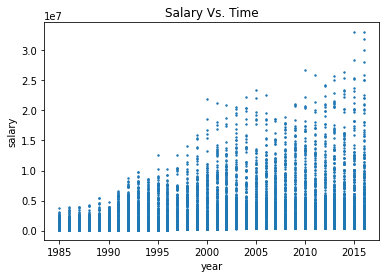

In [29]:
##Visualize how time impacts salary
plt.scatter(pitchingDF.yearID, pitchingDF.RealSalary, s = 2)
plt.title('Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("salary")

plt.show()

In [31]:
yearlyPitchingDF = pitchingDF.groupby(by = 'yearID')

In [32]:
DescriptivePitchingSalaryDF = yearlyPitchingDF.RealSalary.mean().reset_index()

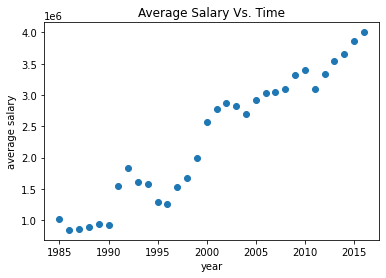

In [33]:
##visualize average salary over the years
plt.scatter(DescriptivePitchingSalaryDF.yearID, DescriptivePitchingSalaryDF.RealSalary)
plt.title('Average Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("average salary")

plt.show()

In [34]:
##Determine when to cutoff salary
cutOffDate = 2003

In [35]:
##remove pitchers from before cut off date
pitchingDF = pitchingDF[pitchingDF.yearID >= cutOffDate]

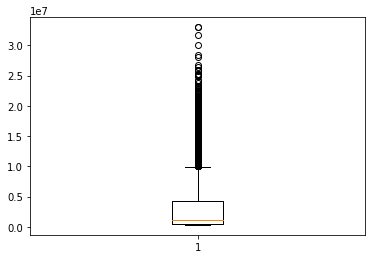

In [36]:
##Boxplot
plt.boxplot(pitchingDF.RealSalary)
plt.show()

In [37]:
##data is highly skewed, introduce Log transform
pitchingDF["LogSalary"] = np.log(pitchingDF.loc[:,"RealSalary"])

C:\Users\maxbu\AppData\Local\Temp/ipykernel_20284/2839918436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitchingDF["LogSalary"] = np.log(pitchingDF.loc[:,"RealSalary"])


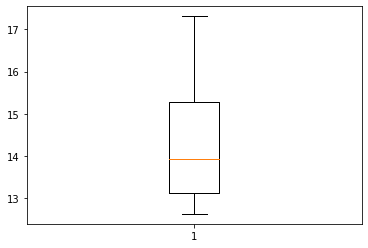

In [38]:
##View Boxplot with log data
plt.boxplot(pitchingDF.LogSalary)
plt.show()

In [39]:
##remove outliers (Baseball has a min salary)
q1p = pitchingDF.LogSalary.quantile(0.25)
q3p = pitchingDF.LogSalary.quantile(0.75)
IQRp = q3p - q1p
maxSal = IQRp*1.5 + q3p

In [40]:
pitchingDF = pitchingDF[pitchingDF.LogSalary <= maxSal]

<h3> Outlier Analysis: Hitting </h3>

In [41]:
##Remove Pitchers from the data set (Historically bad at hitting)
##Need to recreate the original pitching data
pitchersDF = pd.read_csv(r"../Project/joinedPitchingDF.csv",index_col = 0)

booleanPitchers = ~hittingDF.playerID.isin(pitchingDF.playerID)

In [42]:
hittingDF = hittingDF.loc[booleanPitchers == True]

In [43]:
## Add Inflation Values
real_salary_list = []

for i in range(len(hittingDF)):
    real_salary = cpi.inflate(hittingDF.iloc[i].salary, hittingDF.iloc[i].yearID, to=2016)
    real_salary = round(real_salary)
    real_salary_list.append(real_salary)

hittingDF['RealSalary'] = real_salary_list

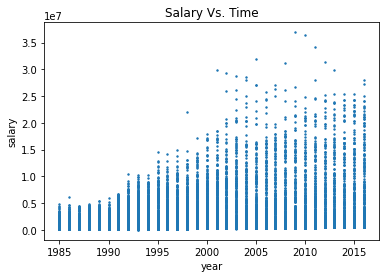

In [44]:
##Visualize Salary as a function of time
plt.scatter(hittingDF.yearID, hittingDF.RealSalary, s = 2)
plt.title('Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("salary")

plt.show()

In [45]:
yearlyHittingDF = hittingDF.groupby(by = 'yearID')

In [46]:
DescriptiveHittingSalaryDF = yearlyHittingDF.RealSalary.mean().reset_index()

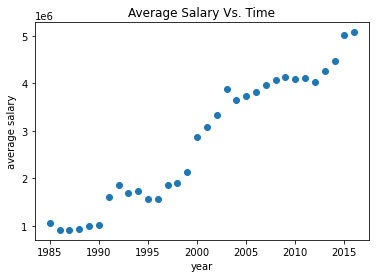

In [47]:
plt.scatter(DescriptiveHittingSalaryDF.yearID, DescriptiveHittingSalaryDF.RealSalary)
plt.title('Average Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("average salary")

plt.show()

In [48]:
##remove pitchers from before cut off date
hittingDF = hittingDF[hittingDF.yearID >= cutOffDate]

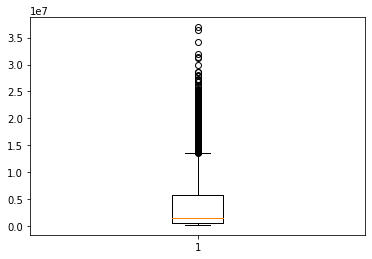

In [49]:
plt.boxplot(hittingDF.RealSalary)
plt.show()

In [50]:
##data is highly skewed, introduce Log transform
hittingDF["LogSalary"] = np.log(hittingDF.loc[:,"RealSalary"])

C:\Users\maxbu\AppData\Local\Temp/ipykernel_20284/789934765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hittingDF["LogSalary"] = np.log(hittingDF.loc[:,"RealSalary"])


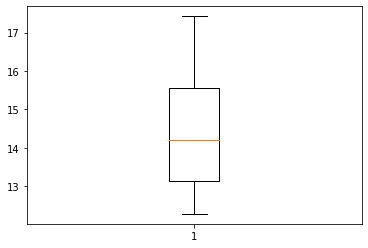

In [51]:
plt.boxplot(hittingDF.LogSalary)
plt.show()

In [52]:
##remove outliers (Baseball has a min salary)
q1h = hittingDF.LogSalary.quantile(0.25)
q3h = hittingDF.LogSalary.quantile(0.75)
IQRh = q3h - q1h
maxSal = IQRh*1.5 + q3h

In [53]:
hittingDF = hittingDF[hittingDF.LogSalary <= maxSal]

In [54]:
finalPitching = pitchingDF
finalHitting = hittingDF

##reset index for formatting
finalPitching = finalPitching.reset_index(drop = True)
finalHitting = finalHitting.reset_index(drop = True)

In [55]:
finalPitching.to_csv(r'../Project/cleansedPitchingDF.csv')

In [56]:
finalHitting.to_csv(r'../Project/cleansedHittingDF.csv')

<h1 align="center">  End Of Data Cleansing2 Contents</h1>

<h1 align="center">  Start Of Dimension Reduction Through Variable Combination Contents:</h1>

 <h3 align="center">  Dimension Reduction Through Variable Combination:</h3>
   
In file "Dimension Reduction - Variable combination.ipynb", cleansed data is imported and variables are aggregated.
  <li>Compliation of XBH, or Extra Base Hits. </li>
  <li>Compliation of SLG, or Slugging  </li>
  <li>Compliation of BA, or Batting Average  </li>
  <li>Compliation of OBP, or On Base Percentage  </li>
  <li>Compliation of OPS, or On Base Plus Slugging  </li>
  <li>Dropping of irrelevant / combined varibles feeding the above common baseball summary statistics </li>
Export of "combinationPitchingDF.csv" and "combinationHittingDF.csv"

In [57]:
##read in csvs
pitchingDF = pd.read_csv(r"../Project/cleansedPitchingDF.csv",index_col = 0)
hittingDF = pd.read_csv(r"../Project/cleansedHittingDF.csv", index_col = 0)

<h3> Hitting Values </h3>

This section of the project was all about combining statistics together to decrease the amount of columns our database had. Some of these are:
  <li>XBH is for extra base hits and combines both 2B (double) and 3B (triple).</li>
  <li>We also made the column SLG, which is a combination of 2B (double) and 3B (triple) to show us the slugging average of each player.</li>
  <li>BA is for batting average, and it’s a statistic we calculated by taking the players hits and dividing that by the players at bat rate. </li>
  <li>OBP is for on base percentage, which is a statistic that shows us how many times on average the player gets on base. This combines many stats and is useful for calculating player worth.</li>
  <li>OPS is the on base plus slugging statistic. This combines the OBP and SLG statistics into one column. It shows us the slugging rate of each player along with their on base percentage.</li>


All of these added statistics will help us make an accurate model in future sections.

In [58]:
## XBH - Extra Base Hits
hittingDF["XBH"] = hittingDF["2B"]+hittingDF["3B"]+hittingDF.HR
## SLG - Slugging (singles = hits - extra base hits)
hittingDF["SLG"] = ((hittingDF.H-hittingDF.XBH)+2*hittingDF["2B"]+3*hittingDF["3B"]+4*hittingDF.HR)/hittingDF.AB

In [59]:
##Batting Average
hittingDF["BA"] = hittingDF.H/hittingDF.AB

In [60]:
## OBP - On Base percentage
hittingDF["OBP"] = (hittingDF.H + hittingDF.BB + hittingDF.HBP)/(hittingDF.AB + hittingDF.BB + hittingDF.HBP + hittingDF.SF)

In [61]:
## OPS - On-Base Plus Slugging
hittingDF["OPS"] = (hittingDF.OBP + hittingDF.SLG)

In [62]:
## Clean up variables that are now accounted for and others that are no longer needed (Our analysis will only be using Log Salary)
hittingDF = hittingDF.drop(columns = ["stint","lgID","teamID","AB","H","2B","3B","HR","BB","HBP","throws","salary","RealSalary"])

<h3> Pitching Values </h3>

For Pitching there is less statistics we need to add, it's more prudent to drop certain columns that have data that are unneeded for our final model. Some of the dropped columns include:


<li> Stint </li>
<li> LgID </li>
<li> TeamID </li>
<li> bats </li>
<li> Salary </li>
<li> RealSalary </li>

In [63]:
##Clean Up Variables
pitchingDF = pitchingDF.drop(columns = ["stint","lgID","teamID","bats","salary","RealSalary"])

<h3> Export Data </h3>

In [64]:
pitchingDF.to_csv(r"../Project/combinationPitchingDF.csv")
hittingDF.to_csv(r"../Project/combinationHittingDF.csv")

<h1 align="center">  End Of Dimension Reduction Through Variable Combination Contents</h1>

<h1 align="center"> Start Of Dealing with NA Values Detected Later:</h1>

As with many things, people always can miss certain things. When starting the PCA analysis, we show that we had missed some missing values in previous sections. Here we made sure to clean up the dataframes more to ensure no missing values were in the data.

In [65]:
pitchingdat = pd.read_csv(r"../Project/combinationPitchingDF.csv", index_col = 0)
hittingdat = pd.read_csv(r"../Project/combinationHittingDF.csv", index_col = 0)

In [66]:
pitchingnoNA = pitchingdat.dropna()

In [67]:
hittingnoNA = hittingdat.dropna()

In [68]:
pitchingnoNA.to_csv("../Project/no_NA_PitchingDF.csv")

In [69]:
hittingnoNA.to_csv("../Project/no_NA_HittingDF.csv")

<h1 align="center"> End Of Dealing with NA Values Detected Later:</h1>

<h1 align="center">  Start Of Correlation Analysis Contents:</h1>

 <h3 align="center">  Correlation Analysis:</h3>

This step is to run several steps of correlation analysis, and reduce the dimensionality of the dataset.

In file "Correlation .ipynb", an initial review of the correlation of variables was conducted. 
<li> Importing the data </li>
<li> Visualizing a heat map of the remaining variables</li>

In [70]:
pitchingdat = pd.read_csv(r"../Project/no_NA_PitchingDF.csv", index_col = 0)
hittingdat = pd.read_csv(r"../Project/no_NA_HittingDF.csv", index_col = 0)

<h3> Correlation Analysis on Pitching DataFrame</h3>

The correlation analysis is to see which variables, if any, increase the dimensionality of the dataset in a way that is disapproval to the benefits the variables give. To see the correlation, we are using the Pearson method of correlation on both the pitching DataFrame and the hitting DataFrame. Once we get the correlation values, we will plot two heatmaps each to illustrate the correlation.

In [71]:
pitchingcorr = pitchingdat.corr(method = 'pearson')

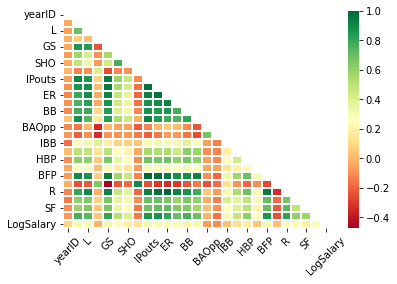

In [72]:
# Corralation Heatmap for Pitching
mask = np.zeros_like(pitchingdat.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(pitchingdat.corr(), cmap = 'RdYlGn', vmax = 1.0, mask = mask, linewidths = 2)

plt.yticks(rotation=0)
plt.xticks(rotation=45);

The heatmap below is the best illustrate our group found for displaying the correlation of the pitching and hitting DataFrames. It is color coded and shows how correlated each value is with each other in an easy to read way. This illustration helped us determine which value had a high correlation that we could remove without decreasing the integrity of the dataset.

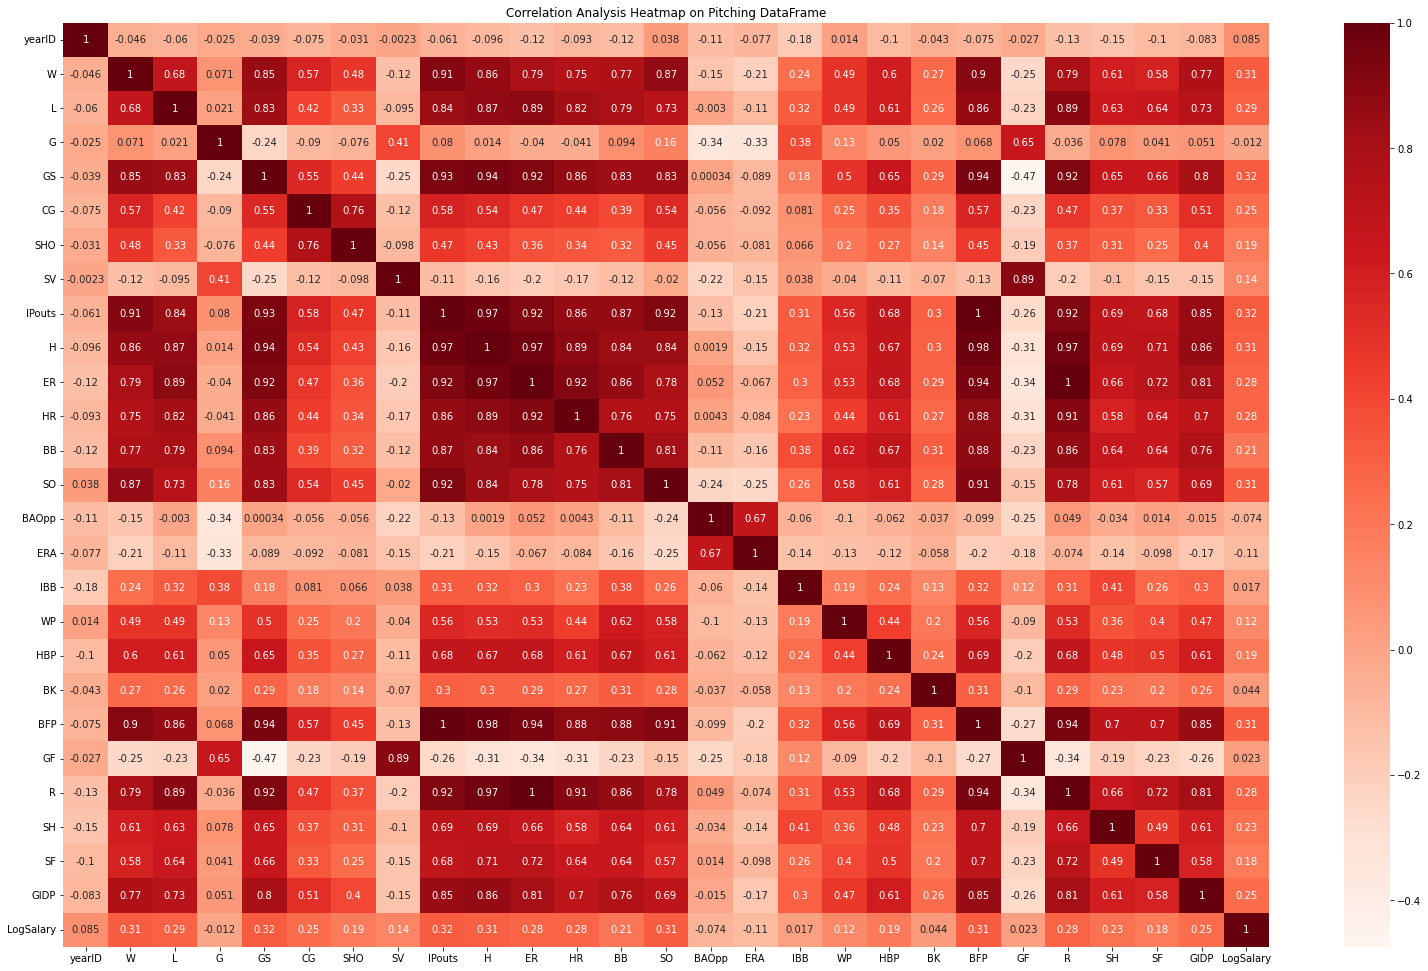

In [73]:
plt.figure(figsize = (27,17))
corrpitching = pitchingdat.corr()
sns.heatmap(corrpitching, annot = True, cmap = plt.cm.Reds)
plt.title("Correlation Analysis Heatmap on Pitching DataFrame")
plt.savefig('PitchingHeatmap')
plt.show()

<h3> Correlation Analysis on Pitching DataFrame</h3>

Same exact correlation steps that were taken for the Hitting DataFrame, using the illustrations to determine which variables need to be removed due to high correlation.

In [74]:
hittingcorr = hittingdat.corr(method = 'pearson')

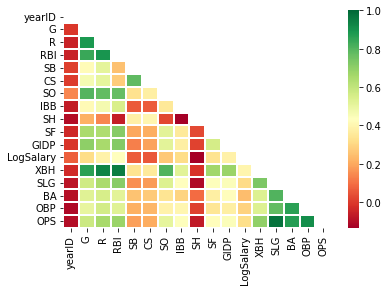

In [75]:
# Corralation Heatmap for Hitting
mask2 = np.zeros_like(hittingdat.corr())
mask2[np.triu_indices_from(mask2)] = True

sns.heatmap(hittingdat.corr(), cmap = 'RdYlGn', vmax = 1.0, mask = mask2, linewidths = 2);

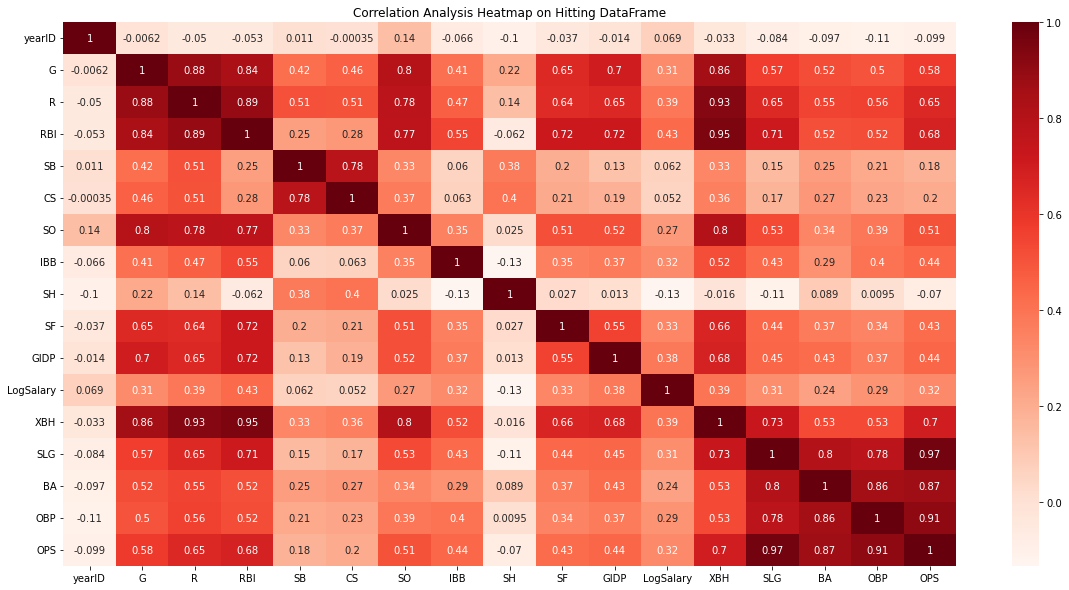

In [76]:
plt.figure(figsize = (20,10))
corrpitching = hittingdat.corr()
sns.heatmap(corrpitching, annot = True, cmap = plt.cm.Reds)
plt.title("Correlation Analysis Heatmap on Hitting DataFrame")
plt.savefig('HittingHeatmap')
plt.show()

<h3> Variable Analysis for Pitching Dataset </h3>

IPOuts – Innings Pitched * Outs and BFP – Batter’s Facing Pitcher. 

    These both have major multicollinearity issues and are measuring the same thing.
    Dropping BFP

R – Runs, ER- Earned Runs. 

    This has high multicollinearity, little difference between the R, ER, and ERA.
    Keeping ERA
    Dropping R, ER

BB – Intentional Base on Balls. 

    More of a coaching decision than player performance. Low correlation to LogSalary.
    Dropping BB

BK – Balks.
    
    Low correlation with LogSalary and some multicollinearity issues.
    Dropping BK

GF – Games Finished. 

    Low correlation with LogSalary and some multicollinearity issues
    Dropping GF

G- Games, 

    Low correlation with LogSalary and multicollinearity issues.
    Dropping G

L- Losses, 

    L has a lot of correlation with W – Wins, 
    Combining into W/L Ratio.
     Dropping both W and L.

<h3> Variable Analysis for Hitting Dataset </h3>
All of the below variables are measuring similar effects and have a large amount of collinearity with eachother. Using variable OPS – On-Base Plus Slugging is a good substitue for all of the variables, and takes all of these into account, so there is very little loss of fidelity.  

+OPS variable added. Removals: 

    ·XBH – Extra Base hits, 
    ·SLG – Slugging, 
    ·BA – Batting Average, 
    ·OBP – On-Base Percentage 
    
Additonally, 

    ·CS – Caught Stealing, removing due to high colinearity with SB – Stolen Bases. 
    
        Someone who steals more bases is likely to get caught more as well, so this make sense.
        Dropping CS.

    ·G – Games played Has multicollinearity with several variables being kept. 
    
        It is also not a reflection of a player’s ability to play.
        Dropping G

<h1 align="center">  End Of Correlation Analysis Contents</h1>

<h1 align="center">  Start Of Removing Values with Multicollinearity:</h1>

In [77]:
pitchingdat = pd.read_csv(r"../Project/no_NA_PitchingDF.csv", index_col = 0)
hittingdat = pd.read_csv(r"../Project/no_NA_HittingDF.csv", index_col = 0)

<h3> Variable Removal From Hitting DataFrame</h3>

After examining the illustrations for the correlation analysis and supplementing those illustrates with more data tables, we determined some of the variables we needed to remove from the datasets due to multicollinearity issues. Some of these values were the stats we created in earlier steps. We were thinking they would help us build a better model, but because they were based off other stats that are still in the model their correlation was high. The variables we decided to remove from the Hitting DataFrame are:

<li> XBH </li>
<li> SLG </li>
<li> OBP </li>
<li> CS </li>
<li> G </li>

In [78]:
hittingdat = hittingdat.drop(columns = ["XBH", "SLG", "OBP" , "CS", "G"])

<h3 align="center"> Variable Removal From Pitching DataFrame</h3>

The variables we decided to remove from the Pitching DataFrame are:

<li> IPouts </li>
<li> BFP </li>
<li> R </li>
<li> ER </li>
<li> IBB </li>
<li> BK </li>
<li> GF </li>
<li> G </li>

In [79]:
pitchingdat = pitchingdat.drop(columns = ["IPouts", "BFP", "R", "ER", "IBB", "BK", "GF", "G"])

<h3> Combining Wins and Loses with a W/L ratio</h3>
<h3> By Combining Winds and Loses we can protect and preserve data fidelity </h3>

<h3> Getting a Ratio of Wins and Losses and then deleting both the W and L columns </h3>
<h3>Because there are some zero values that would result in inf values, I converted those numbers to 0, meaning they have no W/L ratio at this time </h3>

In [80]:
pitchingdat["Win/Loss"] = pitchingdat.W.div(pitchingdat.L)

pitchingdat.loc[~np.isfinite(pitchingdat['Win/Loss']), 'Win/Loss'] = 0

In [81]:
pitchingdat = pitchingdat.drop(columns = ["L", "W"])

<h3> Saving the new csv files with removed values for later use </h3>

In [82]:
pitchingdat.to_csv(r"../Project/Multicollinearity_Removal_Pitching.csv")
hittingdat.to_csv(r"../Project/Multicollinearity_Removal_Hitting.csv")

<h1 align="center">  End Of Removing Values with Multicollinearity:</h1>

<h1 align="center">  Start Of Correlation Analysis with Variable Removal Contents:</h1>

In file "Correlation Analysis after Variable Removal.ipynb", an initial review of the correlation of variables was conducted. 
<li> Importing the data </li>
<li> Visualizing a heat map of the remaining variables</li>

In [83]:
pitchingdat_multi = pd.read_csv(r"../Project/Multicollinearity_Removal_Pitching.csv", index_col = 0)
hittingdat_multi = pd.read_csv(r"../Project/Multicollinearity_Removal_Hitting.csv", index_col = 0)

<h3> Correlation Analysis on Pitching DataFrame</h3>

This correlation analysis was mainly to make sure we helped with the correlation and multicollinearity issues in our DataFrames by removing the variables from the previous steps. We used the same method for the correlation analysis, person, and used the same illustrations and plots to ensure accurate comparisons could be made.

In [84]:
pitchingcorr_multi = pitchingdat_multi.corr(method = 'pearson')

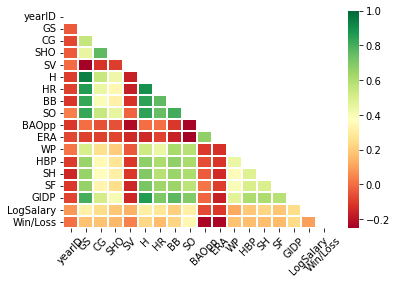

In [85]:
# Corralation Heatmap for Pitching
mask = np.zeros_like(pitchingdat_multi.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(pitchingdat_multi.corr(), cmap = 'RdYlGn', vmax = 1.0, mask = mask, linewidths = 2)

plt.yticks(rotation=0)
plt.xticks(rotation=45);

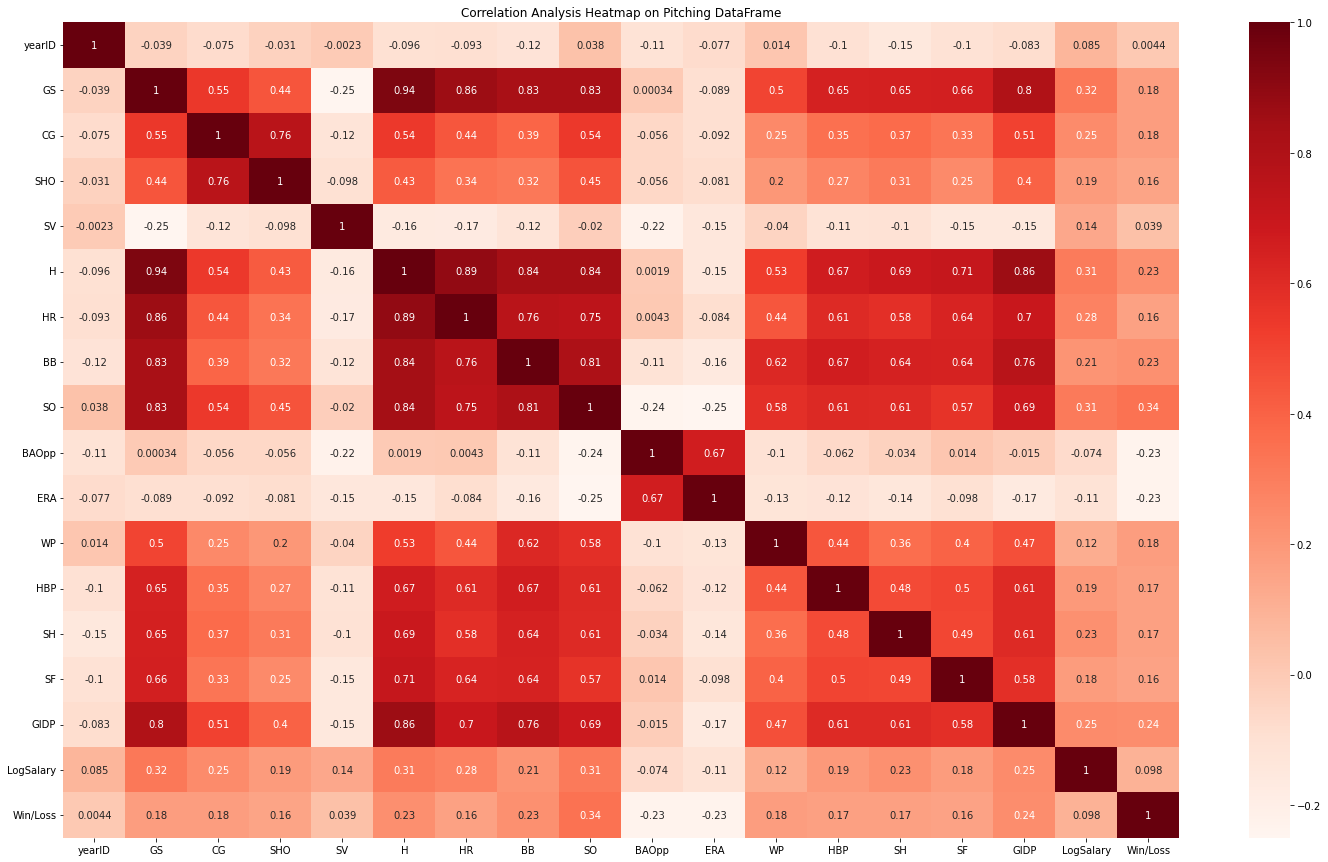

In [86]:
plt.figure(figsize = (25,15))
corrpitching = pitchingdat_multi.corr()
sns.heatmap(corrpitching, annot = True, cmap = plt.cm.Reds)
plt.title("Correlation Analysis Heatmap on Pitching DataFrame")
plt.savefig('PitchingHeatmap2')
plt.show()

<h3> Correlation Analysis on Hitting DataFrame</h3>

In [87]:
hittingcorr_multi = hittingdat_multi.corr(method = 'pearson')

<AxesSubplot:>

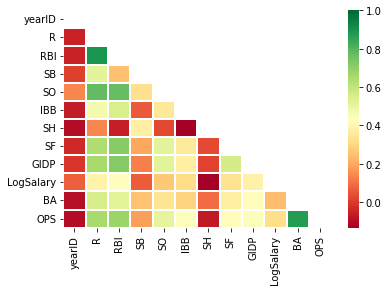

In [88]:
# Corralation Heatmap for Hitting
mask2 = np.zeros_like(hittingdat_multi.corr())
mask2[np.triu_indices_from(mask2)] = True

sns.heatmap(hittingdat_multi.corr(), cmap = 'RdYlGn', vmax = 1.0, mask = mask2, linewidths = 2)

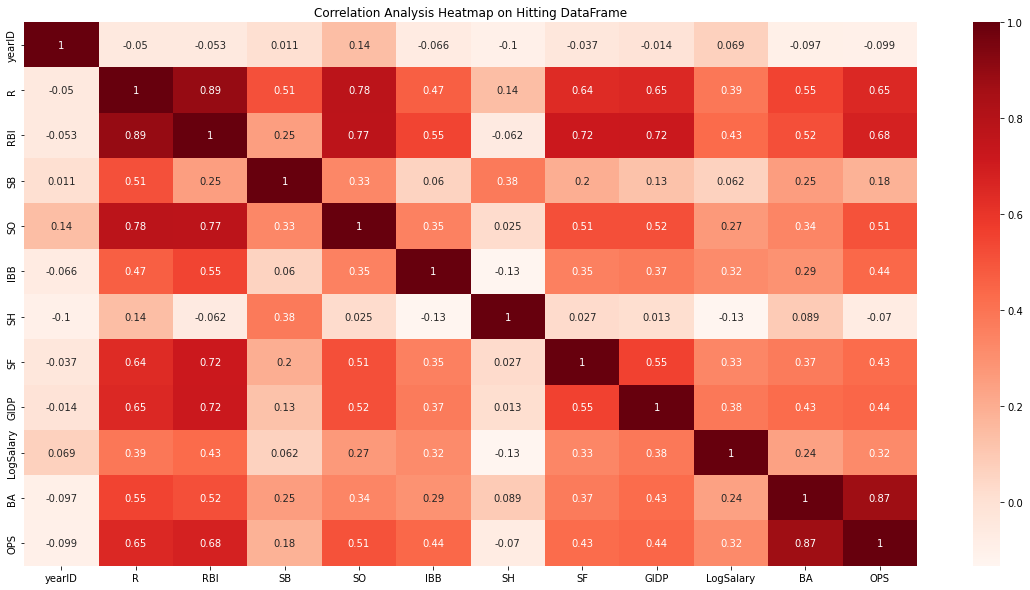

In [89]:
plt.figure(figsize = (20,10))
corrpitching = hittingdat_multi.corr()
sns.heatmap(corrpitching, annot = True, cmap = plt.cm.Reds)
plt.title("Correlation Analysis Heatmap on Hitting DataFrame")
plt.savefig('HittingHeatmap2')
plt.show()

While there are definitely some variables that still have high correlation with others, these variables we decided as a group were too important to our model to remove. Things like the BA, batting average, are too important of a statistic in baseball to remove it. If we want to predict the log salary accurately, we need to keep some variables that have high correlation, but overall we helped reduce the correlation and multicollinearity issues in our DataFrames.

<h1 align="center">  End Of Correlation Analysis with Variable Removal Contents</h1>

<h1 align="center">  Start Of Principal Component Analysis Contents:</h1>

This step is to run and initial PCA, and then repeat the process once reduction is achieved.

In file "PCA.ipynb", an initial review of the principal component analysis.
        Steps included:
        <li>Importing the data from "no_NA_PitchingDF.csv" and "no_NA_HittingDF.csv" </li>
        <li> Normalizing the data</li>
        <li> Setting the PCA up for each dataset </li>
        <li> Running Scree Plots and identifying 90% Integrity levels</li>
        <li> Outputing the initial PCA matrix </li>
       


While this PCA document is placed after the correlation and multicollinearity issues were removed, this PCA analysis was done before that fact. Just like with the correlation analysis, we will have a before and after for the PCA. 

In [90]:
pitchingdat = pd.read_csv(r"../Project/no_NA_PitchingDF.csv", index_col = 0)
hittingdat = pd.read_csv(r"../Project/no_NA_HittingDF.csv", index_col = 0)

<h3> Normailze data before doing PCA </h3>

To make normalizing the data easier to replicate down the line, we decided to reformate the column order of both the Pitching DataFrame and the Hitting DataFrame. This would make it easier to lump all the columns that needed to be normalized together with loc while leaving text columns alone.

In [91]:
#Changing Column order to make it easier to use loc to normalize the dataframe

pitchingdat = pitchingdat.reindex(['playerID', 'yearID', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 
                                   'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP', 
                                   'LogSalary', 'nameFirst', 'nameLast', 'nameGiven', 'throws', 'teamName'], axis = 1)

hittingdat = hittingdat.reindex(['playerID', 'yearID', 'G', 'R', 'RBI', 'SB', 'CS', 'SO', 'IBB', 'SH', 'SF', 'GIDP', 'XBH',
                                 'SLG', 'BA', 'OBP', 'OPS', 'LogSalary', 'nameFirst', 'nameLast', 'nameGiven', 'bats',
                                 'teamName'], axis = 1)

In [92]:
pitchingnorm = scale(pitchingdat.loc[:,'yearID':'LogSalary'])
hittingnorm = scale(hittingdat.loc[:,'yearID':'LogSalary'])

<h3> Principal Component Analysis for Pitching </h3>

We used the same Principal Component Analysis techniques we learned in class, selected the maximum number of n_components to start to see the minimum amount we need to keep the explained variance above 90%. For the Pitching DataFrame, we determined that the number of n_components needed to keep the explained variance above 90% was 11. 

In [93]:
# Selecting Number of Components and fitting the PCA model for Pitching

pitchingPCA = PCA(n_components = 27)
pitchingPCA.fit(pitchingnorm)

PCA(n_components=27)

In [94]:
#The amount of variance that each PC explains

pitchingvar = pitchingPCA.explained_variance_ratio_

print(pitchingvar)

[4.91874483e-01 1.06735723e-01 5.96048959e-02 4.75405965e-02
 4.32897675e-02 3.37437230e-02 3.10957871e-02 2.96256531e-02
 2.29764692e-02 1.88619647e-02 1.83385435e-02 1.63586333e-02
 1.48819077e-02 1.39418396e-02 1.21457219e-02 9.49995117e-03
 8.54474332e-03 6.30689154e-03 5.16070851e-03 3.46344645e-03
 2.73594343e-03 1.54674748e-03 1.06681692e-03 3.62252011e-04
 1.81630137e-04 1.12680135e-04 2.48035381e-06]


In [95]:
#Cumulative Variance Explains for Pitching

pitchingvar1 = np.cumsum(np.round(pitchingPCA.explained_variance_ratio_, decimals = 4)*100)

print(pitchingvar1)

[49.19 59.86 65.82 70.57 74.9  78.27 81.38 84.34 86.64 88.53 90.36 92.
 93.49 94.88 96.09 97.04 97.89 98.52 99.04 99.39 99.66 99.81 99.92 99.96
 99.98 99.99 99.99]


Drawing a Scree Plot for both Pitching and Hitting to show the cumulative variance explained along the number of principal components

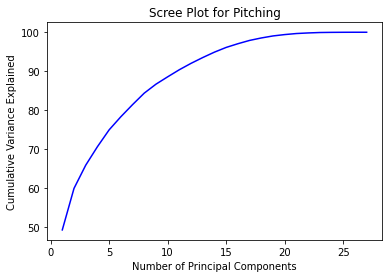

In [96]:
pitchingvar1 = pd.DataFrame(pitchingvar1, index=np.arange(1,28))
plt.plot(pitchingvar1,color='blue')
plt.title('Scree Plot for Pitching')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see if we choose a 11-component solution, the explained variance would be > 90%. 

In [97]:
pitchingPCA11 = PCA(n_components = 11)
pitchingPCA11.fit(pitchingnorm)
data_pitchingPCA11 = pitchingPCA11.transform(pitchingnorm)

pd.DataFrame(pitchingPCA11.components_.transpose(),
            index = pitchingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,12)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yearID,-0.025583,-0.013020,-0.336952,-0.233649,-0.497149,0.251681,0.429230,0.479276,-0.248043,-0.038276,0.067679
W,0.243157,-0.043516,-0.125251,0.016130,0.019409,-0.002033,0.037910,-0.032580,-0.013356,-0.066232,0.027010
L,0.240815,-0.005135,0.106021,0.013764,-0.125143,-0.032996,-0.025765,0.028892,-0.113980,-0.025932,-0.064342
G,0.004591,-0.474743,0.170559,-0.020965,0.120866,0.044103,0.226259,0.130221,-0.007715,0.314885,0.179775
GS,0.260310,0.115893,-0.063932,-0.012797,-0.093931,-0.026464,-0.063999,-0.049949,-0.060345,-0.137557,-0.072206
CG,0.160666,0.048277,-0.371138,0.355248,0.318175,0.053660,0.125033,0.011720,-0.002710,0.095111,0.021124
SHO,0.131554,0.041371,-0.400501,0.371722,0.366621,0.088891,0.208026,0.053607,-0.009982,0.077924,-0.002487
SV,-0.049450,-0.432696,0.057813,0.397553,-0.245006,0.107003,-0.063469,-0.186766,-0.172834,-0.215675,-0.108697
IPouts,0.269531,-0.046035,-0.039626,0.006884,-0.018766,-0.006039,0.021396,-0.017705,-0.061248,-0.038351,-0.014399
H,0.268762,0.012968,0.038787,0.024017,-0.041914,-0.037520,-0.008044,0.002396,-0.104569,0.008679,-0.027277


<h3> Principal Component Analysis for Hitting </h3>

We used the same Principal Component Analysis techniques we learned in class, selected the maximum number of n_components to start to see the minimum amount we need to keep the explained variance above 90%. For the hitting DataFrame, we determined that the number of n_components needed to keep the explained variance above 90% was 8. 

In [98]:
# Selecting Number of Components and fitting the PCA model for Hitting

hittingPCA = PCA(n_components = 17)
hittingPCA.fit(hittingnorm)

PCA(n_components=17)

In [99]:
#The amount of variance that each PC explains

hittingvar = hittingPCA.explained_variance_ratio_

print(hittingvar)

[4.84631380e-01 1.25427779e-01 9.64933833e-02 6.13064128e-02
 4.70088379e-02 4.35962769e-02 3.62445543e-02 2.76148550e-02
 2.57444829e-02 1.37974622e-02 1.26826169e-02 8.55576270e-03
 7.16534048e-03 4.94380383e-03 2.99292452e-03 1.79412747e-03
 1.95828617e-32]


In [100]:
#Cumulative Variance Explains for Hitting

hittingvar1 = np.cumsum(np.round(hittingPCA.explained_variance_ratio_, decimals = 4)*100)

print(hittingvar1)

[48.46 61.   70.65 76.78 81.48 85.84 89.46 92.22 94.79 96.17 97.44 98.3
 99.02 99.51 99.81 99.99 99.99]


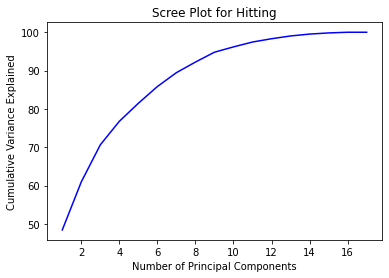

In [101]:
hittingvar1 = pd.DataFrame(hittingvar1, index=np.arange(1,18))
plt.plot(hittingvar1,color='blue')
plt.title('Scree Plot for Hitting')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see that if we choose a 8-component solution, the explained variance would be > 90%.

In [102]:
hittingPCA8 = PCA(n_components = 8)
hittingPCA8.fit(hittingnorm)
data_hittingPCA8 = hittingPCA8.transform(hittingnorm)

pd.DataFrame(hittingPCA8.components_.transpose(),
            index = hittingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,9)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
yearID,-0.017810,0.036497,-0.253805,0.867017,-0.108011,-0.190238,0.296642,0.148002
G,0.307946,0.160843,-0.140689,-0.063136,-0.148560,-0.101990,0.060193,-0.125382
R,0.323707,0.141478,-0.094940,-0.039941,-0.007689,0.077188,-0.051962,-0.088893
RBI,0.321305,-0.048061,-0.206368,-0.094181,-0.085929,0.051542,-0.050503,-0.030654
SB,0.139469,0.509306,0.152532,0.139915,0.230789,0.269834,-0.149177,0.176236
CS,0.149334,0.511538,0.147658,0.115449,0.171740,0.215392,-0.128059,0.095387
SO,0.269252,0.110838,-0.233024,0.139514,-0.281333,0.144672,-0.060773,-0.372852
IBB,0.191876,-0.184060,-0.123805,-0.137318,0.295664,0.469087,0.737067,0.116036
SH,0.019694,0.464547,0.210719,-0.216993,0.004085,-0.514133,0.500432,-0.190056
SF,0.240224,0.007011,-0.238656,-0.186013,-0.068233,-0.218217,-0.094054,0.798986


<h1 align="center">  End Of Principal Component Analysis Contents</h1>

<h1 align="center">  Start Of Principal Component Analysis with Variable Removal Contents:</h1>

This step is to run with a repeated PCA, once variables have been removed from above correlation studies

In file "PCA after Variable Removal.ipynb", an initial review of the principal component analysis.
        Steps included:
        <li>Importing the data from "Multicollinearity_Removal_Pitching.csv" and "Multicollinearity_Removal_Hitting.csv" </li>
        <li> Normalizing the data</li>
        <li> Setting the PCA up for each dataset </li>
        <li> Running Scree Plots and identifying 90% Integrity levels</li>
        <li> Outputing the new PCA matrix </li>

In [103]:
pitchingdat = pd.read_csv(r"../Project/Multicollinearity_Removal_Pitching.csv", index_col = 0)
hittingdat = pd.read_csv(r"../Project/Multicollinearity_Removal_Hitting.csv", index_col = 0)

<h3> Normailze data before doing PCA </h3>

As we did with the correlation analysis, we wanted to take a look at the PCA analysis after we removed all the correlation and multicollinearity issues that were present in our DataFrames.

In [104]:
#Changing Column order to make it easier to use loc to normalize the dataframe

pitchingdat = pitchingdat.reindex(['playerID', 'yearID', 'GS', 'CG', 'SHO', 'SV', 'H', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 
                                   'WP', 'HBP', 'SH', 'SF', 'GIDP', 'Win/Loss', 'LogSalary', 'nameFirst', 'nameLast', 
                                   'nameGiven', 'throws', 'teamName'], axis = 1)

hittingdat = hittingdat.reindex(['playerID', 'yearID', 'R', 'RBI', 'SB', 'SO', 'IBB', 'SH', 'SF', 'GIDP', 'BA', 'OPS', 
                                 'LogSalary', 'nameFirst', 'nameLast', 'nameGiven', 'bats', 'teamName'], axis = 1)

In [105]:
pitchingnorm_multi = scale(pitchingdat.loc[:,'yearID':'LogSalary'])
hittingnorm_multi = scale(hittingdat.loc[:,'yearID':'LogSalary'])

In [106]:
pitching_corr = pd.DataFrame(pitchingnorm_multi).describe().transpose()
pitching_corr

,count,mean,std,min,25%,50%,75%,max
0,5503.0,9.668443e-15,1.000091,-1.640313,-0.896297,0.095723,0.839738,1.583753
1,5503.0,-2.582383e-18,1.000091,-0.764392,-0.764392,-0.764392,0.941984,2.027859
2,5503.0,3.873575e-17,1.000091,-0.357607,-0.357607,-0.357607,-0.357607,11.803639
3,5503.0,-2.840622e-17,1.000091,-0.293937,-0.293937,-0.293937,-0.293937,12.982693
4,5503.0,2.195026e-17,1.000091,-0.335457,-0.335457,-0.335457,-0.219348,6.863307
5,5503.0,-1.032953e-17,1.000091,-1.277552,-0.747497,-0.384030,0.782093,2.781160
6,5503.0,7.230673e-17,1.000091,-1.167523,-0.800492,-0.311117,0.667632,4.460286
7,5503.0,6.197720e-17,1.000091,-1.375342,-0.765693,-0.249837,0.594292,4.205287
8,5503.0,-8.263626e-17,1.000091,-1.244577,-0.750731,-0.256886,0.511319,4.260888
9,5503.0,-3.925222e-16,1.000091,-4.351648,-0.476195,-0.062151,0.401578,8.897763


In [107]:
hitting_corr = pd.DataFrame(hittingnorm_multi).describe().transpose()
hitting_corr

,count,mean,std,min,25%,50%,75%,max
0,5373.0,1.337243e-14,1.000093,-1.571616,-0.831754,-0.091892,0.894591,1.634453
1,5373.0,1.110843e-16,1.000093,-1.468272,-0.885174,-0.107710,0.766937,3.164118
2,5373.0,-7.934592e-17,1.000093,-1.391244,-0.848488,-0.146098,0.683999,3.589340
3,5373.0,-5.554215e-17,1.000093,-0.643605,-0.643605,-0.424316,0.123909,7.908701
4,5373.0,8.463565e-17,1.000093,-1.616305,-0.817169,-0.117926,0.706183,3.952672
5,5373.0,0.000000e+00,1.000093,-0.612681,-0.612681,-0.376633,0.095465,27.713184
6,5373.0,3.173837e-17,1.000093,-0.635943,-0.635943,-0.264256,0.107432,8.284550
7,5373.0,-3.438323e-17,1.000093,-1.133355,-0.720086,-0.306817,0.519720,5.065676
8,5373.0,-3.702810e-17,1.000093,-1.331118,-0.820229,-0.139045,0.542139,4.118357
9,5373.0,-2.115891e-17,1.000093,-4.709223,-0.400737,0.126940,0.586664,14.073085


<h3> Principal Component Analysis for Pitching </h3>

In [108]:
# Selecting Number of Components and fitting the PCA model for Pitching

pitchingPCA = PCA(n_components = 18)
pitchingPCA.fit(pitchingnorm_multi)

PCA(n_components=18)

In [109]:
#The amount of variance that each PC explains

pitchingvar = pitchingPCA.explained_variance_ratio_

print(pitchingvar)

[0.43153099 0.10872301 0.07267512 0.05862232 0.05685596 0.04646408
 0.0428496  0.03219407 0.028242   0.02769304 0.02230389 0.02071778
 0.0149272  0.01290433 0.00999551 0.00699367 0.00457728 0.00173015]


In [110]:
#Cumulative Variance Explains for Pitching

pitchingvar1 = np.cumsum(np.round(pitchingPCA.explained_variance_ratio_, decimals = 4)*100)

print(pitchingvar1)

[43.15 54.02 61.29 67.15 72.84 77.49 81.77 84.99 87.81 90.58 92.81 94.88
 96.37 97.66 98.66 99.36 99.82 99.99]


Drawing a Scree Plot for both Pitching and Hitting to show the cumulative variance explained along the number of principal components

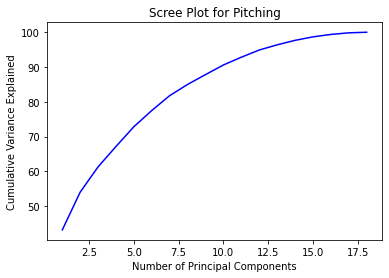

In [111]:
pitchingvar1 = pd.DataFrame(pitchingvar1, index=np.arange(1,19))
plt.plot(pitchingvar1,color='blue')
plt.title('Scree Plot for Pitching')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see that if we choose a 10-component solution, the explained variance would be > 90%.

This is one less n_component then what we used before removing variables due to correlation and multicollinearity issues.

In [113]:
pitchingPCA11 = PCA(n_components = 10)
pitchingPCA11.fit(pitchingnorm_multi)
data_pitchingPCA11 = pitchingPCA11.transform(pitchingnorm_multi)

pd.DataFrame(pitchingPCA11.components_.transpose(),
            index = pitchingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,11)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
yearID,-0.032059,-0.179879,0.070432,0.683152,-0.582365,0.060158,0.103310,-0.319918,0.035531,0.060734
GS,0.335430,0.098082,-0.007945,0.087079,-0.057510,-0.065262,-0.072484,-0.046474,-0.011485,0.020103
CG,0.222165,-0.001882,0.592801,-0.123691,-0.005756,-0.044305,0.133334,0.014078,-0.065751,-0.037857
SHO,0.185842,-0.016216,0.653585,-0.139715,-0.046748,-0.042919,0.210557,-0.024839,-0.002970,-0.040900
SV,-0.057823,-0.338162,-0.043675,0.189639,0.650100,0.138027,0.447518,-0.416374,-0.060557,-0.008648
H,0.345448,0.068543,-0.050188,0.037759,0.022958,-0.018900,-0.060445,-0.114911,-0.010595,-0.027830
HR,0.310222,0.096697,-0.092428,0.075071,0.028704,-0.062107,-0.098726,-0.119432,-0.126946,-0.030937
BB,0.319700,0.009240,-0.208482,-0.024521,-0.002740,0.000613,0.109144,0.034196,0.054558,0.033345
SO,0.320603,-0.133180,-0.003232,0.076065,-0.032807,0.081684,0.115486,-0.035695,0.040921,0.032766
BAOpp,-0.036494,0.612714,0.049245,0.156817,0.103185,0.252665,0.012898,-0.081977,0.054253,-0.041101


<h3> Principal Component Analysis for Hitting </h3>

In [114]:
# Selecting Number of Components and fitting the PCA model for Hitting

hittingPCA = PCA(n_components = 12)
hittingPCA.fit(hittingnorm_multi)

PCA(n_components=12)

In [115]:
#The amount of variance that each PC explains

hittingvar = hittingPCA.explained_variance_ratio_

print(hittingvar)

[0.43823134 0.1255481  0.09769304 0.07633407 0.06210274 0.05732521
 0.04912046 0.0375884  0.03351924 0.01180716 0.00624365 0.00448659]


In [116]:
#Cumulative Variance Explains for Hitting

hittingvar1 = np.cumsum(np.round(hittingPCA.explained_variance_ratio_, decimals = 4)*100)

print(hittingvar1)

[43.82 56.37 66.14 73.77 79.98 85.71 90.62 94.38 97.73 98.91 99.53 99.98]


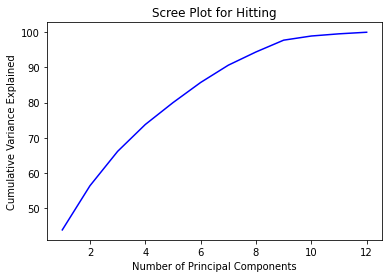

In [117]:
hittingvar1 = pd.DataFrame(hittingvar1, index=np.arange(1,13))
plt.plot(hittingvar1,color='blue')
plt.title('Scree Plot for Hitting')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see that if we choose a 7-component solution, the explained variance would be > 90%.

This is one less n_component then what we used before removing variables due to correlation and multicollinearity issues.

In [119]:
hittingPCA8 = PCA(n_components = 7)
hittingPCA8.fit(hittingnorm_multi)
data_hittingPCA8 = hittingPCA8.transform(hittingnorm_multi)

pd.DataFrame(hittingPCA8.components_.transpose(),
            index = hittingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,8)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
yearID,-0.017919,-0.117548,-0.718768,0.568385,-0.001604,-0.062439,0.322427
R,0.404014,0.155902,-0.090016,-0.068651,-0.063118,0.087214,-0.120324
RBI,0.409430,-0.080819,-0.059863,-0.139808,-0.153176,-0.023753,-0.053202
SB,0.163396,0.582754,-0.177994,0.094927,0.136725,0.420821,-0.371017
SO,0.337051,0.058819,-0.308313,-0.010017,-0.335465,0.063943,-0.154527
IBB,0.254480,-0.253148,0.102854,-0.161078,0.007358,0.689177,0.568414
SH,0.012745,0.672243,0.008402,-0.142396,0.252838,-0.190056,0.560317
SF,0.319089,-0.028341,-0.103126,-0.295643,-0.096775,-0.308346,-0.002272
GIDP,0.326053,-0.090390,-0.082639,-0.220443,0.016234,-0.408956,0.188036
BA,0.299938,0.087819,0.413094,0.517043,0.079371,-0.182338,0.076104


<h1 align="center">  End Of Principal Component Analysis with Variable Removal Contents:</h1>

<h1 align="center">  Summary for Milestone 2</h1>

The research team was able to:
<li> Gather, clean, and combine Raw data, removing many irrelvant data fields </li>
<li> Visualize and analyse, and adjust salary information to a common year </li>
<li> Identify variable reduction by identifying correlation to dependent variable and other independent variables </li>
<li> Perform a PCA on the reduced data</li>

For the Pitching data, variable count was analytically reduced from 27 to 18. PCA was reduced from 11 components to 10.

For the Hitting data, variable count was analytically reduced from 17 to 12. PCA was reduced from 8 components to 7.

This simplification of the data will help the team develop a reliable model for salary data for both pitchers and batters. This will allow the front office to have a more reliable model in the future for any salary negotiations as they come up.

<h1 align = 'center'> Start of Milestone 3 </h1>

<h1 align = 'center'> Data Preparation for Models </h1>

<h1 align="center">  Defining Salary Classes</h1>

In this step we are designating and defining the salary classes that will be used in our final models. We decided to make 4 salary classes: Low, Medium, High, and All-Star

In [121]:
q1h = hittingDF.LogSalary.quantile(0.25)
medh = hittingDF.LogSalary.quantile(0.5)
q3h = hittingDF.LogSalary.quantile(0.75)

In [122]:
q1p = pitchingDF.LogSalary.quantile(0.25)
medp = pitchingDF.LogSalary.quantile(0.5)
q3p = pitchingDF.LogSalary.quantile(0.75)

In [123]:
hittingdat['Salary Class'] = ''
hittingdat.loc[(hittingdat['LogSalary'] > 0) & (hittingdat['LogSalary'] <= q1h), 'Salary Class'] = 'Low'
hittingdat.loc[(hittingdat['LogSalary'] > q1h) & (hittingdat['LogSalary'] <= medh), 'Salary Class'] = 'Medium'
hittingdat.loc[(hittingdat['LogSalary'] > medh) & (hittingdat['LogSalary'] <= q3h), 'Salary Class'] = 'High'
hittingdat.loc[(hittingdat['LogSalary'] > q3h), 'Salary Class'] = 'All-Star'

In [124]:
pitchingdat['Salary Class'] = ''
pitchingdat.loc[(pitchingdat['LogSalary'] > 0) & (pitchingdat['LogSalary'] <= q1p), 'Salary Class'] = 'Low'
pitchingdat.loc[(pitchingdat['LogSalary'] > q1p) & (pitchingdat['LogSalary'] <= medp), 'Salary Class'] = 'Medium'
pitchingdat.loc[(pitchingdat['LogSalary'] > medp) & (pitchingdat['LogSalary'] <= q3p), 'Salary Class'] = 'High'
pitchingdat.loc[(pitchingdat['LogSalary'] > q3p), 'Salary Class'] = 'All-Star'

<h1 align="center">  Spliting Data into Training and Testing Data </h1>

<h3> Pitching Dataset </h3>

Here we are establishing our x and y varaibles and preparing them for a 20-80 split to create training and testing data.

In [125]:
pit_y = pitchingdat[["LogSalary","Salary Class"]]
pit_X = pitchingdat.drop(columns = ["LogSalary","playerID","yearID","nameFirst","nameLast","nameGiven","teamName","Salary Class"])

In [126]:
pit_X = pd.get_dummies(data=pit_X,columns = ["throws"], prefix = ["throws"])

In [127]:
# 20-80 split of data

pit_train_y, pit_test_y, pit_train_X, pit_test_X = train_test_split(pit_y, pit_X,
                                                 test_size=0.2,
                                                 random_state=2021)

In [128]:
## Break data into regressor and classifier dataframes

pit_train_y_classifier = pit_train_y["Salary Class"]
pit_train_y_regressor = pit_train_y["LogSalary"]
pit_test_y_classifier = pit_test_y["Salary Class"]
pit_test_y_regressor = pit_test_y["LogSalary"]

<h3> Hitting Dataset </h3>

In [129]:
hit_y = hittingdat[["LogSalary","Salary Class"]]
hit_X = hittingdat.drop(columns = ["LogSalary","playerID","yearID","nameFirst","nameLast","nameGiven","teamName","Salary Class"])

In [130]:
hit_X = pd.get_dummies(data=hit_X,columns = ["bats"], prefix = ["bats"])

In [131]:
# 20-80 split

hit_train_y, hit_test_y, hit_train_X, hit_test_X = train_test_split(hit_y, hit_X,
                                                 test_size=0.2,
                                                 random_state=2021)

In [133]:
## Break data into regressor and classifier dataframes

hit_train_y_classifier = hit_train_y["Salary Class"]
hit_train_y_regressor = hit_train_y["LogSalary"]
hit_test_y_classifier = hit_test_y["Salary Class"]
hit_test_y_regressor = hit_test_y["LogSalary"]



<h3> Feature Importance: Pitching </h3>

In [134]:
randomForest = RandomForestRegressor()

In [135]:
randomForest.fit(pit_train_X, pit_train_y_regressor)

RandomForestRegressor()

In [136]:
feature_importances = pd.DataFrame(randomForest.feature_importances_, 
                                   index = pit_train_X.columns,
                                   columns = ['importance'])

feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
GS,0.128939
BB,0.092783
SO,0.089111
ERA,0.088434
H,0.082254
BAOpp,0.080243
SV,0.072862
Win/Loss,0.060182
GIDP,0.053554
HR,0.052782


<AxesSubplot:title={'center':'Feature Importance of Pitching Dataset'}>

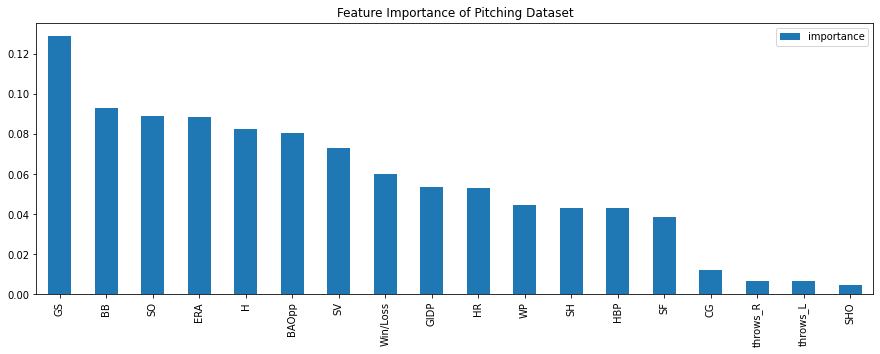

In [137]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of Pitching Dataset')

<h3> Feature Importance: Hitting </h3>

In [138]:
randomForest = RandomForestRegressor()

In [139]:
randomForest.fit(hit_train_X, hit_train_y_regressor)

RandomForestRegressor()

In [140]:
feature_importances = pd.DataFrame(randomForest.feature_importances_, 
                                   index = hit_train_X.columns,
                                   columns = ['importance'])

feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
RBI,0.242186
SO,0.110042
BA,0.109925
OPS,0.109569
R,0.091699
GIDP,0.073404
SH,0.065551
IBB,0.059894
SB,0.059412
SF,0.048485


<AxesSubplot:title={'center':'Feature Importance of Hitting Dataset'}>

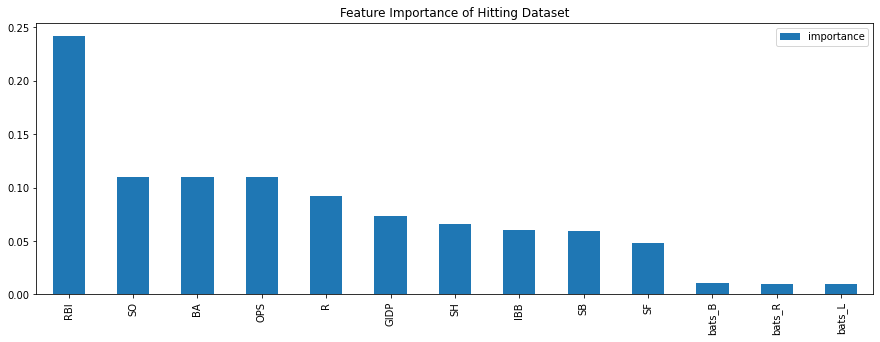

In [141]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of Hitting Dataset')

<h3> Analysis of Feature Importance </h3>
<br></br>
Reviewing the plots for both pitching and hitting reveals that there is no further need to continue to eliminate features from the dataset.

<h1 align = 'center'> Regression Analysis </h1>
<br></br>
For our regression analysis we would like to create an explanatory model that determines how much each feature impacts salary. Because we are building an explanatory model we will not be partitioning the dataset.

<h3> Pitching </h3>

In [142]:
##Create a dataframe for regression and add a constant
pit_y_regress = pit_y.drop(columns = ["Salary Class"])
pit_X_regress = pit_X
pit_X_regress["const"] = 1

In [143]:
mod_full = sm.OLS(pit_y_regress,pit_X_regress).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogSalary   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     71.69
Date:                Sat, 04 Dec 2021   Prob (F-statistic):          1.32e-223
Time:                        20:38:18   Log-Likelihood:                -8333.7
No. Observations:                5503   AIC:                         1.670e+04
Df Residuals:                    5485   BIC:                         1.682e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GS             0.0462      0.004     11.699      0.000       0.038       0.054
CG             0.1109      0.028      3.944      0.000       0.056       0.166
SHO           -0.0688      0.051     -1.349      0.177      -0.169       0.031
SV             0.0334      0.002     17.118      0.000       0.030       0.037
H             -0.0008      0.001     -0.695      0.487      -0.003       0.001
HR             0.0056      0.004      1.300      0.194      -0.003       0.014
BB            -0.0143      0.002     -8.798      0.000      -0.018      -0.011
SO             0.0017      0.001      2.524      0.012       0.000       0.003
BAOpp          0.1998      0.370      0.540      0.589      -0.525       0.925
ERA           -0.0177      0.006     -3.056      0.002      -0.029      -0.006
WP            -0.0126      0.007     -1.899      0.058      -0.026       0.000
HBP           -0.0001      0.007     -0.022      0.982      -0.013       0.013
SH             0.0184      0.007      2.662      0.008       0.005       0.032
SF            -0.0060      0.009     -0.638      0.524      -0.024       0.012
GIDP          -0.0024      0.005     -0.487      0.626      -0.012       0.007
Win/Loss       0.0207      0.015      1.370      0.171      -0.009       0.050
throws_L       4.6963      0.036    129.881      0.000       4.625       4.767
throws_R       4.6460      0.034    137.393      0.000       4.580       4.712
const          9.3423      0.061    152.464      0.000       9.222       9.462
==============================================================================
Omnibus:                      637.266   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.567
Skew:                           0.217   Prob(JB):                     3.11e-46
Kurtosis:                       2.148   Cond. No.                     6.84e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

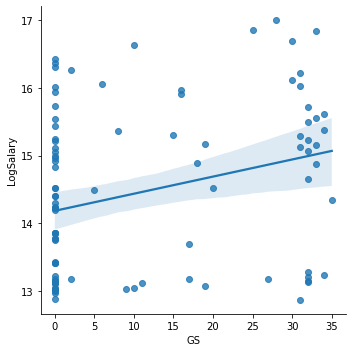

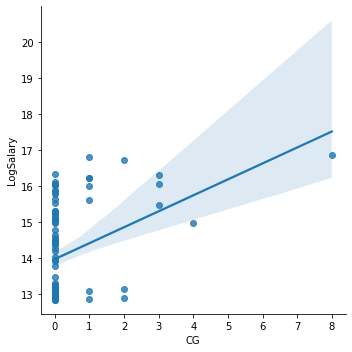

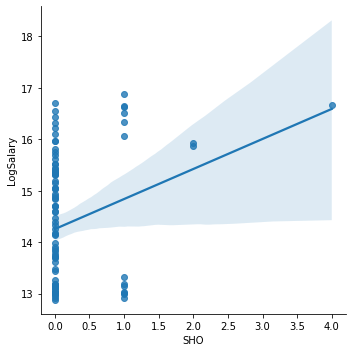

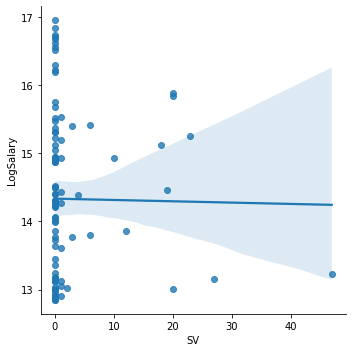

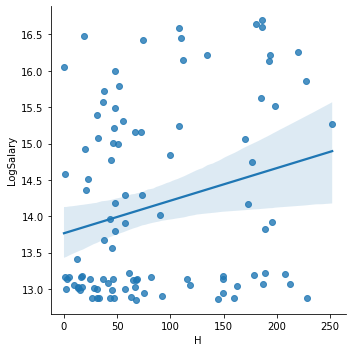

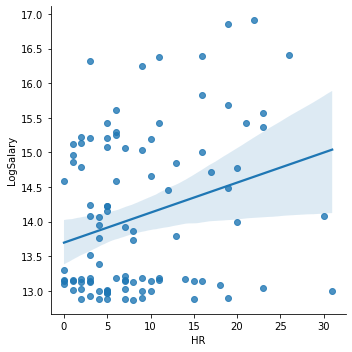

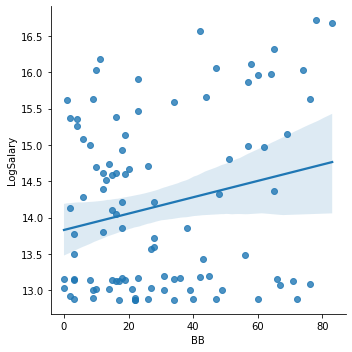

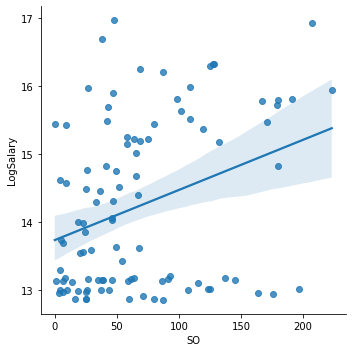

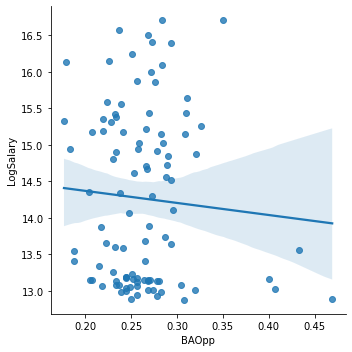

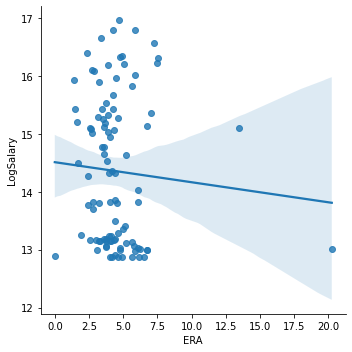

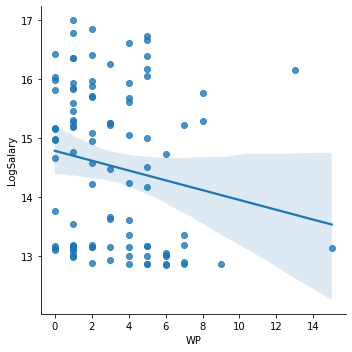

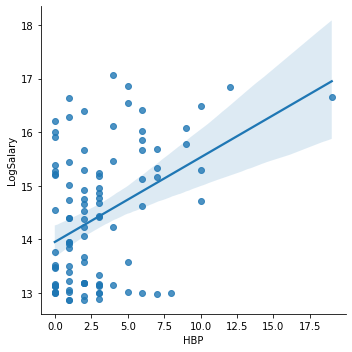

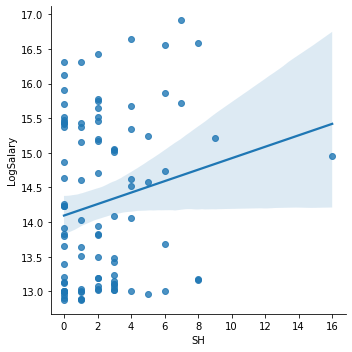

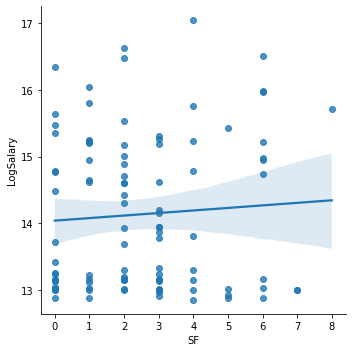

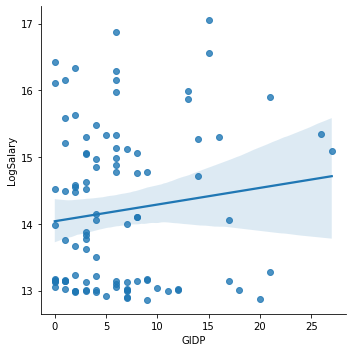

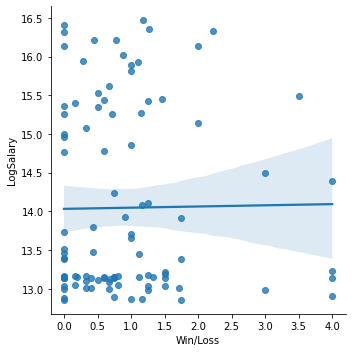

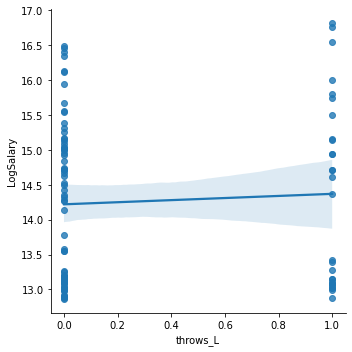

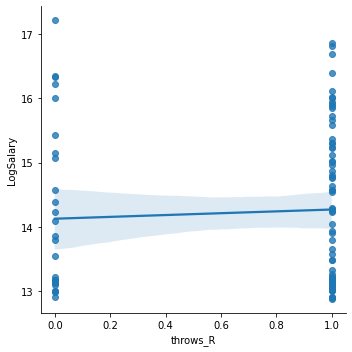

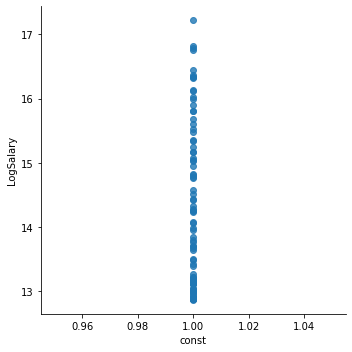

In [144]:
for columns in pit_X.columns:
    sns.lmplot(data=pd.concat([pit_X,pit_y],axis = 1).sample(100), x = columns, y = "LogSalary")
    plt.show()

<h3> Hitting </h3>

In [145]:
##Create a dataframe for regression and add a constant
hit_y_regress = hit_y.drop(columns = ["Salary Class"])
hit_X_regress = hit_X
hit_X_regress["const"] = 1

In [146]:
mod_full = sm.OLS(hit_y_regress,hit_X_regress).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogSalary   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     137.0
Date:                Sat, 04 Dec 2021   Prob (F-statistic):          3.67e-300
Time:                        20:38:26   Log-Likelihood:                -8288.2
No. Observations:                5373   AIC:                         1.660e+04
Df Residuals:                    5360   BIC:                         1.669e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R              0.0105      0.002      6.565      0.000       0.007       0.014
RBI            0.0031      0.002      1.855      0.064      -0.000       0.006
SB            -0.0036      0.002     -1.490      0.136      -0.008       0.001
SO            -0.0049      0.001     -7.327      0.000      -0.006      -0.004
IBB            0.0254      0.005      5.547      0.000       0.016       0.034
SH            -0.0617      0.007     -9.162      0.000      -0.075      -0.048
SF             0.0335      0.009      3.570      0.000       0.015       0.052
GIDP           0.0383      0.004      9.226      0.000       0.030       0.046
BA            -2.3899      0.705     -3.391      0.001      -3.771      -1.008
OPS            1.0828      0.285      3.805      0.000       0.525       1.641
bats_B         3.5137      0.038     92.539      0.000       3.439       3.588
bats_L         3.3730      0.033    101.760      0.000       3.308       3.438
bats_R         3.3629      0.030    110.610      0.000       3.303       3.422
const         10.2496      0.068    151.532      0.000      10.117      10.382
==============================================================================
Omnibus:                      213.863   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.362
Skew:                           0.123   Prob(JB):                     5.92e-23
Kurtosis:                       2.370   Cond. No.                     5.84e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

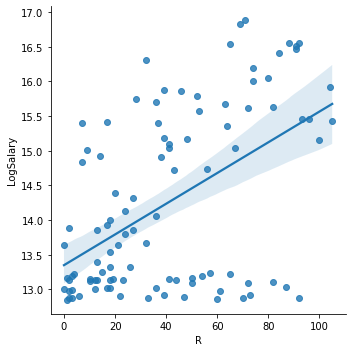

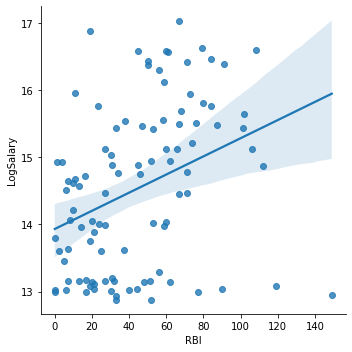

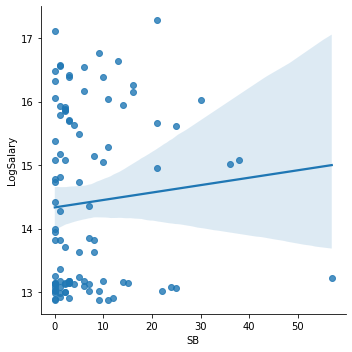

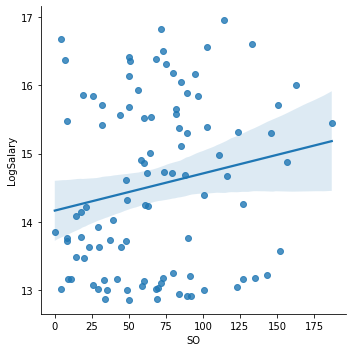

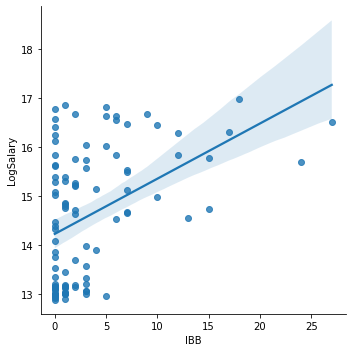

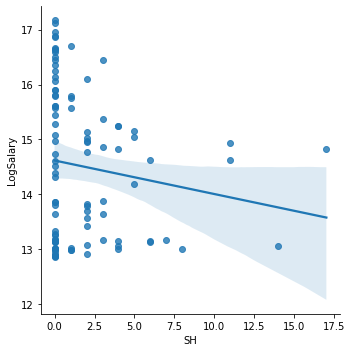

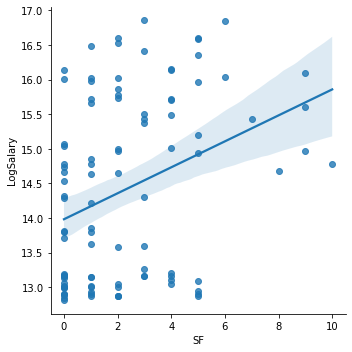

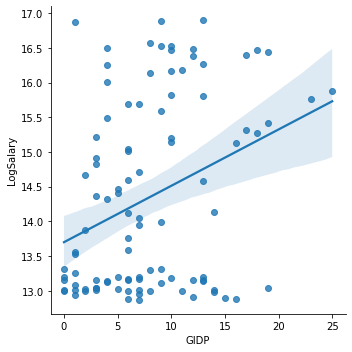

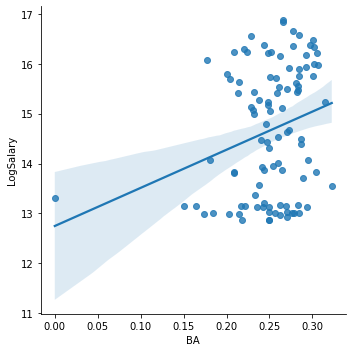

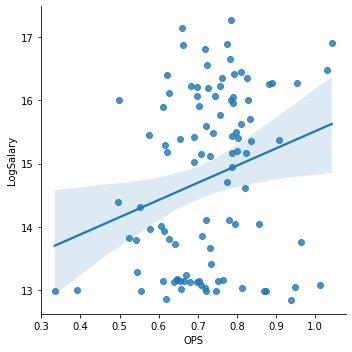

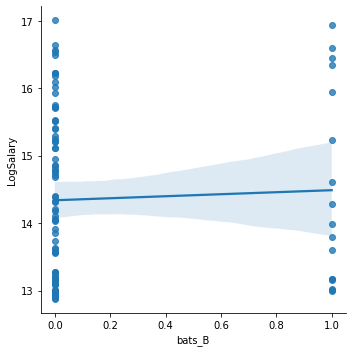

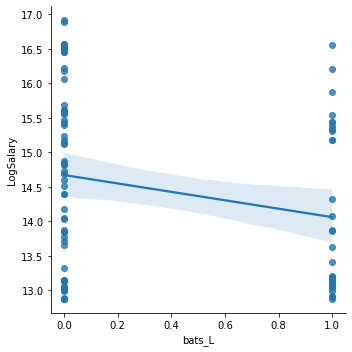

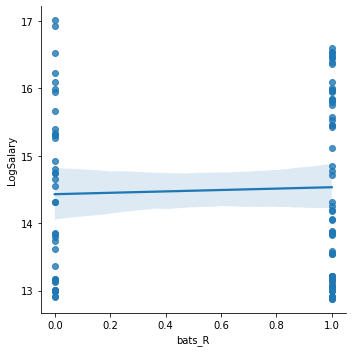

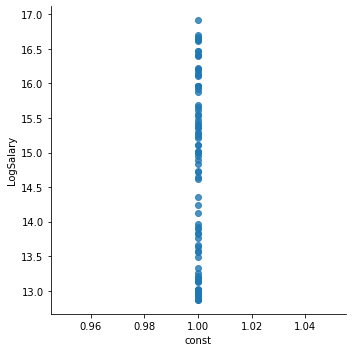

In [147]:
for columns in hit_X.columns:
    sns.lmplot(data=pd.concat([hit_X,hit_y],axis = 1).sample(100), x = columns, y = "LogSalary")
    plt.show()

<h1 align="center">  Data Normalization</h1>

<h3> Normalized Data for Hitting </h3>

In [148]:
# Create a scaler to do the transformation for hitting
hit_scaler = preprocessing.MinMaxScaler().fit(hit_train_X)

In [149]:
# Transform hit train X
hit_train_X_scale = hit_scaler.transform(hit_train_X)
hit_train_X_scale = pd.DataFrame(hit_train_X_scale)
hit_train_X_scale.columns = hit_train_X.columns

In [150]:
# Transform hit test X
hit_test_X_scale = hit_scaler.transform(hit_test_X)
hit_test_X_scale = pd.DataFrame(hit_test_X_scale)
hit_test_X_scale.columns = hit_test_X.columns

<h3> Normalized Data for Pitching </h3>

In [151]:
# Create a scaler to do the transformation for pitching
pit_scaler = preprocessing.MinMaxScaler().fit(pit_train_X)

In [152]:
# Transform pit train X
pit_train_X_scale = pit_scaler.transform(pit_train_X)
pit_train_X_scale = pd.DataFrame(pit_train_X_scale)
pit_train_X_scale.columns = pit_train_X.columns

In [153]:
# Transform pit test X
pit_test_X_scale = pit_scaler.transform(pit_test_X)
pit_test_X_scale = pd.DataFrame(pit_test_X_scale)
pit_test_X_scale.columns = pit_test_X.columns

<h1 align = 'center'> Predictive Analytics </h1>

<h2> Pitching Classification </h2>

<h3> Pitching: Random Forest Classifier </h3>

In [154]:
rf = RandomForestClassifier(n_estimators=5, max_features=10, random_state=1984)

In [155]:
rf.fit(pit_train_X, pit_train_y_classifier)

RandomForestClassifier(max_features=10, n_estimators=5, random_state=1984)

In [156]:
pred_y_rf_pit = rf.predict(pit_test_X)

In [157]:
metrics.confusion_matrix(pit_test_y_classifier, pred_y_rf_pit)

array([[150,  44,  37,  31],
       [ 91,  80,  59,  54],
       [ 57,  76,  88,  56],
       [ 66,  82,  74,  56]], dtype=int64)

In [158]:
metrics.accuracy_score(pit_test_y_classifier, pred_y_rf_pit)

0.33969118982742963

<h3> Pitching: Random Forest Classifier Hypertuned </h3>

In [159]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators':[10,20,30,40,50,60,70,80,90,100,150,200,250,400,500],
              'max_features':[1,3,5,7,9,13],
              'random_state':[1984]}

In [160]:
rf2 = RandomForestClassifier()

In [161]:
grid_rf = GridSearchCV(rf2, parameters, scoring = 'accuracy', cv = 5, n_jobs=-2)

In [243]:
##grid_rf.fit(pit_train_X, pit_train_y_classifier)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [1, 3, 5, 7, 9, 13],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 150, 200, 250, 400, 500],
                         'random_state': [1984]},
             scoring='accuracy')

In [244]:
##grid_rf.best_params_

{'criterion': 'gini',
 'max_features': 3,
 'n_estimators': 500,
 'random_state': 1984}

In [164]:
rf_final_pitch = RandomForestClassifier(n_estimators=500, max_features=3, criterion='gini', random_state=1984)

In [165]:
rf_final_pitch.fit(pit_train_X, pit_train_y_classifier)

RandomForestClassifier(max_features=3, n_estimators=500, random_state=1984)

In [166]:
pred_y_rffinal_pit = rf_final_pitch.predict(pit_test_X)

In [167]:
metrics.confusion_matrix(pit_test_y_classifier, pred_y_rffinal_pit)

array([[171,  31,  35,  25],
       [ 83,  66,  70,  65],
       [ 54,  51,  97,  75],
       [ 53,  69,  73,  83]], dtype=int64)

In [168]:
metrics.accuracy_score(pit_test_y_classifier, pred_y_rffinal_pit)

0.3787465940054496

<h3> Pitching: SVM </h3>

In [169]:
svc_linear = svm.SVC(kernel = 'linear', C=1.0)

In [170]:
svc_linear.fit(pit_train_X_scale, pit_train_y_classifier)

SVC(kernel='linear')

In [171]:
pred_y_SVM_pit = svc_linear.predict(pit_test_X_scale)

In [172]:
metrics.confusion_matrix(pit_test_y_classifier, pred_y_SVM_pit)

array([[183,   6,  19,  54],
       [ 81,  26,  41, 136],
       [ 61,  12,  58, 146],
       [ 60,  13,  37, 168]], dtype=int64)

In [173]:
metrics.accuracy_score(pit_test_y_classifier, pred_y_SVM_pit)

0.39509536784741145

<h3> Pitching: SVM Hypertuned </h3>

In [174]:
parameters = {'kernel':['linear','rbf','poly'],
              'C':[0.001,0.005,0.01,0.025,0.05,1,5,10,100],
              'gamma':[0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}

In [175]:
svc_pit = svm.SVC()

In [176]:
grid_svc = GridSearchCV(svc_pit, parameters, scoring='accuracy', cv=5, n_jobs = -2)

In [245]:
##grid_svc.fit(pit_train_X_scale, pit_train_y_classifier)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-2,
             param_grid={'C': [0.001, 0.005, 0.01, 0.025, 0.05, 1, 5, 10, 100],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [246]:
grid_svc.best_params_

{'C': 100, 'gamma': 0.3, 'kernel': 'rbf'}

In [179]:
svc_final_pit = svm.SVC(kernel='rbf', C=100, gamma=0.3)

In [180]:
svc_final_pit.fit(pit_train_X_scale, pit_train_y_classifier)

SVC(C=100, gamma=0.3)

In [181]:
pred_y_SVMFinal_pit = svc_final_pit.predict(pit_test_X_scale)

In [182]:
metrics.confusion_matrix(pit_test_y_classifier, pred_y_SVMFinal_pit)

array([[180,  16,  36,  30],
       [ 83,  53,  59,  89],
       [ 57,  32,  95,  93],
       [ 60,  39,  59, 120]], dtype=int64)

In [183]:
metrics.accuracy_score(pit_test_y_classifier, pred_y_SVMFinal_pit)

0.4069028156221617

<h3> Pitching Classification Summarization </h3>

In [184]:
acc = [metrics.accuracy_score(pit_test_y_classifier, pred_y_rf_pit),
      metrics.accuracy_score(pit_test_y_classifier, pred_y_rffinal_pit),
      metrics.accuracy_score(pit_test_y_classifier, pred_y_SVM_pit),
      metrics.accuracy_score(pit_test_y_classifier, pred_y_SVMFinal_pit)]

kappa = [metrics.cohen_kappa_score(pit_test_y_classifier, pred_y_rf_pit),
      metrics.cohen_kappa_score(pit_test_y_classifier, pred_y_rffinal_pit),
      metrics.cohen_kappa_score(pit_test_y_classifier, pred_y_SVM_pit),
      metrics.cohen_kappa_score(pit_test_y_classifier, pred_y_SVMFinal_pit)]

In [185]:
pd.DataFrame({'Accuracy':acc, 'Kappa':kappa}, 
             index = ['Random Forest', 'Random Forest w/ Hypertuning', 'SVM', 'SVM w/ Hypertuning'])

,Accuracy,Kappa
Random Forest,0.339691,0.120905
Random Forest w/ Hypertuning,0.378747,0.173227
SVM,0.395095,0.196065
SVM w/ Hypertuning,0.406903,0.211339


<h2> Pitching Regression </h2>

<h3> Nearest Neighbors Regression </h3>

In [186]:
knn_pit = KNeighborsRegressor()

In [187]:
knn_pit.fit(pit_train_X_scale,pit_train_y_regressor)

KNeighborsRegressor()

In [188]:
pred_knn_y_pit = knn_pit.predict(pit_test_X_scale)

In [189]:
metrics.r2_score(pit_test_y_regressor, pred_knn_y_pit)

0.06005705766046143

<h3> Nearest Neighbors Regression Hypertuned </h3>

In [190]:
knn2_pit = KNeighborsRegressor()

In [191]:
parameters = {'n_neighbors': range(1,20,1)}

In [192]:
grid_knn = GridSearchCV(knn2_pit, parameters, scoring = 'r2', cv=5, n_jobs=-2)

In [247]:
##grid_knn.fit(pit_train_X_scale, pit_train_y_regressor)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-2,
             param_grid={'n_neighbors': range(1, 20)}, scoring='r2')

In [248]:
grid_knn.best_params_

{'n_neighbors': 19}

In [195]:
knnfinal_pit = KNeighborsRegressor(n_neighbors=19)

In [196]:
knnfinal_pit.fit(pit_train_X_scale, pit_train_y_regressor)

KNeighborsRegressor(n_neighbors=19)

In [197]:
pred_knnfinal_y_pit = knnfinal_pit.predict(pit_test_X_scale)

In [198]:
metrics.r2_score(pit_test_y_regressor, pred_knn_y_pit)

0.06005705766046143

<h2> Hitting Classification </h2>

<h3> Hitting: Random Forest Classifier </h3>

In [199]:
rf = RandomForestClassifier(n_estimators=5, max_features=10, random_state=1984)

In [200]:
rf.fit(hit_train_X, hit_train_y_classifier)

RandomForestClassifier(max_features=10, n_estimators=5, random_state=1984)

In [201]:
pred_y_rf_hit = rf.predict(hit_test_X)

In [202]:
metrics.confusion_matrix(hit_test_y_classifier, pred_y_rf_hit)

array([[136,  57,  32,  28],
       [ 99,  82,  44,  44],
       [ 58,  64,  89,  58],
       [ 66,  62,  80,  76]], dtype=int64)

In [203]:
metrics.accuracy_score(hit_test_y_classifier, pred_y_rf_hit)

0.35627906976744184

<h3> Hitting: Random Forest Classifier Hypertuned </h3>

In [204]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators':[10,20,30,40,50,60,70,80,90,100,150,200,250,400,500],
              'max_features':[1,3,5,7,9,13],
              'random_state':[1984]}

In [205]:
rf2 = RandomForestClassifier()

In [206]:
grid_rf = GridSearchCV(rf2, parameters, scoring = 'accuracy', cv = 5, n_jobs=-2)

In [249]:
##grid_rf.fit(pit_train_X, pit_train_y_classifier)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [1, 3, 5, 7, 9, 13],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 150, 200, 250, 400, 500],
                         'random_state': [1984]},
             scoring='accuracy')

In [250]:
##grid_rf.best_params_

{'criterion': 'gini',
 'max_features': 3,
 'n_estimators': 500,
 'random_state': 1984}

In [209]:
rf_final_hit = RandomForestClassifier(n_estimators=500, max_features=3, criterion='gini', random_state=1984)

In [210]:
rf_final_hit.fit(hit_train_X, hit_train_y_classifier)

RandomForestClassifier(max_features=3, n_estimators=500, random_state=1984)

In [211]:
pred_y_rffinal_hit = rf_final_hit.predict(hit_test_X)

In [212]:
metrics.confusion_matrix(hit_test_y_classifier, pred_y_rffinal_hit)

array([[147,  61,  21,  24],
       [ 78,  87,  45,  59],
       [ 41,  51,  93,  84],
       [ 46,  52,  71, 115]], dtype=int64)

In [213]:
metrics.accuracy_score(hit_test_y_classifier, pred_y_rffinal_hit)

0.4111627906976744

<h3> Hitting: SVM </h3>

In [214]:
svc_linear = svm.SVC(kernel = 'linear', C=1.0)

In [215]:
svc_linear.fit(hit_train_X_scale, hit_train_y_classifier)

SVC(kernel='linear')

In [216]:
pred_y_SVM_hit = svc_linear.predict(hit_test_X_scale)

In [217]:
metrics.confusion_matrix(hit_test_y_classifier, pred_y_SVM_hit)

array([[161,  26,   7,  59],
       [ 85,  65,  16, 103],
       [ 54,  28,  19, 168],
       [ 50,  29,  18, 187]], dtype=int64)

In [218]:
metrics.accuracy_score(hit_test_y_classifier, pred_y_SVM_hit)

0.4018604651162791

<h3> Hitting: SVM Hypertuned </h3>

In [219]:
parameters = {'kernel':['linear','rbf','poly'],
              'C':[0.001,0.005,0.01,0.025,0.05,1,5,10,100],
              'gamma':[0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}

In [220]:
svc_hit = svm.SVC()

In [221]:
grid_svc = GridSearchCV(svc_hit, parameters, scoring='accuracy', cv=5, n_jobs = -2)

In [243]:
##grid_svc.fit(hit_train_X_scale, hit_train_y_classifier)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-2,
             param_grid={'C': [0.001, 0.005, 0.01, 0.025, 0.05, 1, 5, 10, 100],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [244]:
##grid_svc.best_params_

{'C': 100, 'gamma': 0.4, 'kernel': 'poly'}

In [222]:
svc_final_hit = svm.SVC(kernel='poly', C=100, gamma=0.4)

In [223]:
svc_final_hit.fit(hit_train_X_scale, hit_train_y_classifier)

SVC(C=100, gamma=0.4, kernel='poly')

In [224]:
pred_y_SVMFinal_hit = svc_final_hit.predict(hit_test_X_scale)

In [225]:
metrics.confusion_matrix(hit_test_y_classifier, pred_y_SVMFinal_hit)

array([[150,  51,  18,  34],
       [ 82,  84,  34,  69],
       [ 43,  50,  87,  89],
       [ 53,  43,  58, 130]], dtype=int64)

In [226]:
metrics.accuracy_score(hit_test_y_classifier, pred_y_SVMFinal_hit)

0.41953488372093023

<h3> Hitting Classification Summarization </h3>

In [227]:
acc = [metrics.accuracy_score(hit_test_y_classifier, pred_y_rf_hit),
      metrics.accuracy_score(hit_test_y_classifier, pred_y_rffinal_hit),
      metrics.accuracy_score(hit_test_y_classifier, pred_y_SVM_hit),
      metrics.accuracy_score(hit_test_y_classifier, pred_y_SVMFinal_hit)]

kappa = [metrics.cohen_kappa_score(hit_test_y_classifier, pred_y_rf_hit),
      metrics.cohen_kappa_score(hit_test_y_classifier, pred_y_rffinal_hit),
      metrics.cohen_kappa_score(hit_test_y_classifier, pred_y_SVM_hit),
      metrics.cohen_kappa_score(hit_test_y_classifier, pred_y_SVMFinal_hit)]

In [228]:
pd.DataFrame({'Accuracy':acc, 'Kappa':kappa}, 
             index = ['Random Forest', 'Random Forest w/ Hypertuning', 'SVM', 'SVM w/ Hypertuning'])

,Accuracy,Kappa
Random Forest,0.356279,0.144061
Random Forest w/ Hypertuning,0.411163,0.215330
SVM,0.401860,0.200244
SVM w/ Hypertuning,0.419535,0.226180


<h2> Hitting Regression </h2>

<h3> Nearest Neighbors Regression </h3>

In [229]:
knn_hit = KNeighborsRegressor()

In [230]:
knn_hit.fit(hit_train_X_scale,hit_train_y_regressor)

KNeighborsRegressor()

In [231]:
pred_knn_y_hit = knn_hit.predict(hit_test_X_scale)

In [232]:
metrics.r2_score(hit_test_y_regressor, pred_knn_y_hit)

0.04775280680016469

<h3> Nearest Neighbors Regression Hypertuned </h3>

In [233]:
knn2_hit = KNeighborsRegressor()

In [234]:
parameters = {'n_neighbors': range(1,20,1)}

In [235]:
grid_knn = GridSearchCV(knn2_hit, parameters, scoring = 'r2', cv=5, n_jobs=-2)

In [262]:
##grid_knn.fit(hit_train_X_scale, hit_train_y_regressor)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-2,
             param_grid={'n_neighbors': range(1, 20)}, scoring='r2')

In [263]:
##grid_knn.best_params_

{'n_neighbors': 19}

In [236]:
knnfinal_hit = KNeighborsRegressor(n_neighbors=19)

In [237]:
knnfinal_hit.fit(hit_train_X_scale, hit_train_y_regressor)

KNeighborsRegressor(n_neighbors=19)

In [238]:
pred_knnfinal_y_hit = knnfinal_hit.predict(hit_test_X_scale)

In [239]:
metrics.r2_score(hit_test_y_regressor, pred_knn_y_hit)

0.04775280680016469

<h1 align="center">  Data Dictonary for Baseball Statistics DataFrame</h1>

In [240]:
dat_dict = pd.read_csv(r"../Project/StatsDictionary.csv")

In [241]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dat_dict)

       StatType         Stat                                 Name  \
0       Batting           1B                               Single   
1       Batting           2B                               Double   
2       Batting           3B                               Triple   
3       Batting           AB                               At bat   
4       Batting        AB/HR                 At bats per home run   
5       Batting           BA                      Batting average   
6       Batting           BB                 Base on balls (walk)   
7       Batting         BB/K              Walk-to-strikeout ratio   
8       Batting          XBH                      Extra base hits   
9       Batting           FC                     Fielder's choice   
10      Batting        AO/GO           Ground ball fly ball ratio   
11      Batting  GDP or GiDP            Grounded into double play   
12      Batting           GS                           Grand Slam   
13      Batting            H      

In [242]:
dat_dict.to_dict('index')

{0: {'StatType': 'Batting',
  'Stat': '1B',
  'Name': 'Single',
  'Def': 'Hits on which the batter reached first base safely without the contribution of a fielding error.'},
 1: {'StatType': 'Batting',
  'Stat': '2B',
  'Name': 'Double',
  'Def': 'Hits on which the batter reached second base safely without the contribution of a fielding error.'},
 2: {'StatType': 'Batting',
  'Stat': '3B',
  'Name': 'Triple',
  'Def': 'Hits on which the batter reached third base safely without the contribution of a fielding error.'},
 3: {'StatType': 'Batting',
  'Stat': 'AB',
  'Name': 'At bat',
  'Def': 'Batting appearances, not including bases on balls, hit by pitch, sacrifices, interference, or obstruction.'},
 4: {'StatType': 'Batting',
  'Stat': 'AB/HR',
  'Name': 'At bats per home run',
  'Def': 'At bats divided by home runs.'},
 5: {'StatType': 'Batting',
  'Stat': 'BA',
  'Name': 'Batting average',
  'Def': 'Hits divided by bats.'},
 6: {'StatType': 'Batting',
  'Stat': 'BB',
  'Name': 'Base o